## Company Default Data

In [184]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

Let us now go ahead and read the dataset and check the first five rows of the dataset.

In [185]:
Company = pd.read_excel('CompData-1.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


#### Now, let us check the number of rows (observations) and the number of columns (variables)

In [186]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


#### Checking datatype of all columns

In [187]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [188]:
Company.duplicated().sum()

0

#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [189]:
Company.describe()

,Co_Code,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
count,2058.000000,2.058000e+03,2.058000e+03,2058.000000,2.058000e+03,2058.000000,1891.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2044.000000,2058.000000,2.058000e+03,2058.000000,2058.000000,2058.000000,2058.0,2058.000000,2058.000000
mean,17572.113217,2.052389e+09,1.208634e+09,0.465243,1.113022e+07,0.114777,0.319986,0.176967,0.022761,0.848108,...,0.314629,0.039352,0.003401,2.779397e+07,0.623686,0.027852,0.565435,1.0,0.042529,0.106900
std,21892.886518,3.252624e+09,2.144568e+09,0.022663,9.042595e+07,0.152446,0.015300,0.030157,0.021701,0.004589,...,0.012780,0.047978,0.058236,4.717714e+08,0.011631,0.013839,0.011535,0.0,0.059525,0.309061
min,4.000000,1.000260e-04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.169449,0.000000,0.004282,0.736430,...,0.000000,0.000000,0.000000,0.000000e+00,0.408682,0.012845,0.172065,1.0,0.003946,0.000000
25%,3674.000000,1.578727e-04,0.000000e+00,0.460099,2.760280e-04,0.000000,0.314989,0.166604,0.022058,0.847974,...,0.312783,0.021775,0.000000,9.124052e-04,0.623327,0.026776,0.565158,1.0,0.020408,0.000000
50%,6240.000000,3.330330e-04,1.994130e-04,0.463445,4.540450e-04,0.037099,0.320648,0.175642,0.022100,0.848039,...,0.314642,0.032652,0.000000,2.479550e-03,0.623750,0.026815,0.565315,1.0,0.028460,0.000000
75%,24280.750000,4.110000e+09,1.550000e+09,0.468069,6.630660e-04,0.216191,0.325918,0.185885,0.022152,0.848115,...,0.316546,0.043947,0.000000,7.004449e-03,0.624045,0.027029,0.566232,1.0,0.043433,0.000000
max,72493.000000,9.980000e+09,9.980000e+09,1.000000,9.900000e+08,0.999696,0.462227,0.792348,1.000000,1.000000,...,0.569231,1.000000,1.000000,9.820000e+09,0.956387,0.464388,0.666761,1.0,1.000000,1.000000


#### What does variable 'default' look like

In [190]:
Company['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

#### Checking proportion of default

In [191]:
Company['Default'].value_counts(normalize=True)

0    0.8931
1    0.1069
Name: Default, dtype: float64

In [192]:
Company.Default.sum() / len(Company.Default)

0.10689990281827016

In [193]:
Company.isnull().sum()

Co_Code                                                0
Co_Name                                                0
_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                   

In [194]:
Company1 = Company.drop(['Co_Code', 'Co_Name','_Net_Income_Flag','_Liability_Assets_Flag'], axis = 1)

In [195]:
Company1.size


111132

In [196]:
Company1.isnull().sum().sum()

298

In [197]:
298/119364

0.00249656512851446

There are missing values in the dataset

In [198]:
Company_X = Company1.drop('Default', axis = 1)
Company_Y = Company1['Default']

In [199]:
Company_X

,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,...,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Equity_to_Liability
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,...,0.632666,0.458073,0.576869,0.310901,0.034913,0.028801,0.620927,0.026930,0.565744,0.015338
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,...,0.642967,0.459282,0.551523,0.314572,0.041653,0.006191,0.622513,0.026297,0.560741,0.029445
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,...,0.644486,0.459700,0.463045,0.314777,0.033560,0.001095,0.623749,0.027276,0.566744,0.041718
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,...,0.656832,0.461860,0.577212,0.316974,0.016527,0.003749,0.622963,0.026988,0.565950,0.026956
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,...,0.656549,0.461238,0.594038,0.317729,0.034497,0.006595,0.624419,0.027498,0.567177,0.019900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,3.021580e-04,6.490000e+09,0.477066,0.000000,0.183014,0.322063,0.192739,0.022127,0.848020,0.217591,...,0.700703,0.519602,0.599051,0.320387,0.004430,0.000420,0.624567,0.026791,0.565158,0.171662
2054,1.371450e-04,0.000000e+00,0.465211,0.000658,0.000000,0.319764,0.169391,0.022072,0.847997,0.217638,...,0.624767,0.453011,0.583909,0.312324,0.032284,0.000882,0.624008,0.024201,0.573670,0.053740
2055,2.114990e-04,8.370000e+09,0.480248,0.000502,0.000000,0.327828,0.155005,0.021861,0.847818,0.217524,...,0.631151,0.455126,0.646378,0.313122,0.040998,0.009579,0.623718,0.026702,0.564697,0.054984
2056,3.750000e+09,0.000000e+00,0.474670,0.000578,0.306205,0.322027,0.173834,0.022167,0.848115,0.217588,...,0.651743,0.462513,0.614016,0.315632,0.020275,0.004958,0.623443,0.026943,0.565792,0.057553


In [200]:
Company_Y

0       0
1       1
2       0
3       0
4       0
       ..
2053    0
2054    0
2055    0
2056    0
2057    0
Name: Default, Length: 2058, dtype: int64

#### Let's check the number of outliers per column

In [319]:
Company1.boxplot(figsize=(16,8))
plt.xticks(rotation=90)
plt.show()

AssertionError: 2

In [202]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [203]:
for column in Company_X.columns:
    lr,ur=remove_outlier(Company[column])
    Company_X[column]=np.where(Company_X[column]>ur,ur,Company_X[column])
    Company_X[column]=np.where(Company_X[column]<lr,lr,Company_X[column])

In [204]:
Company = pd.concat([Company_X, Company_Y], axis = 1)

In [205]:
Company.boxplot(figsize=(16,8))
plt.xticks(rotation=90)
plt.show()

AssertionError: 27

In [320]:
Company.isnull().sum()

_Operating_Expense_Rate                                0
_Research_and_development_expense_rate                 0
_Cash_flow_rate                                        0
_Interest_bearing_debt_interest_rate                   0
_Tax_rate_A                                            0
_Cash_Flow_Per_Share                                 167
_Per_Share_Net_profit_before_tax_Yuan_                 0
_Realized_Sales_Gross_Profit_Growth_Rate               0
_Operating_Profit_Growth_Rate                          0
_Continuous_Net_Profit_Growth_Rate                     0
_Total_Asset_Growth_Rate                               0
_Net_Value_Growth_Rate                                 0
_Total_Asset_Return_Growth_Rate_Ratio                  0
_Cash_Reinvestment_perc                                0
_Current_Ratio                                         0
_Quick_Ratio                                           0
_Interest_Expense_Ratio                                0
_Total_debt_to_Total_net_worth 

In [321]:
Company.isnull().sum().sum()

298

##### Let's visually inspect the missing values in our data

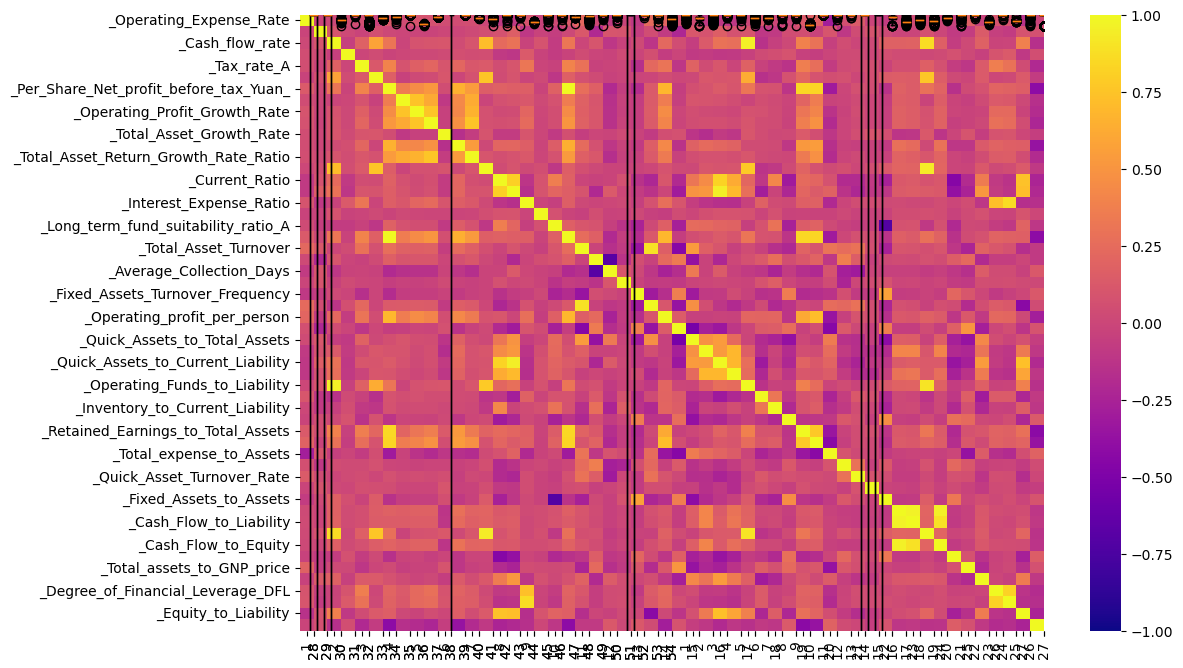

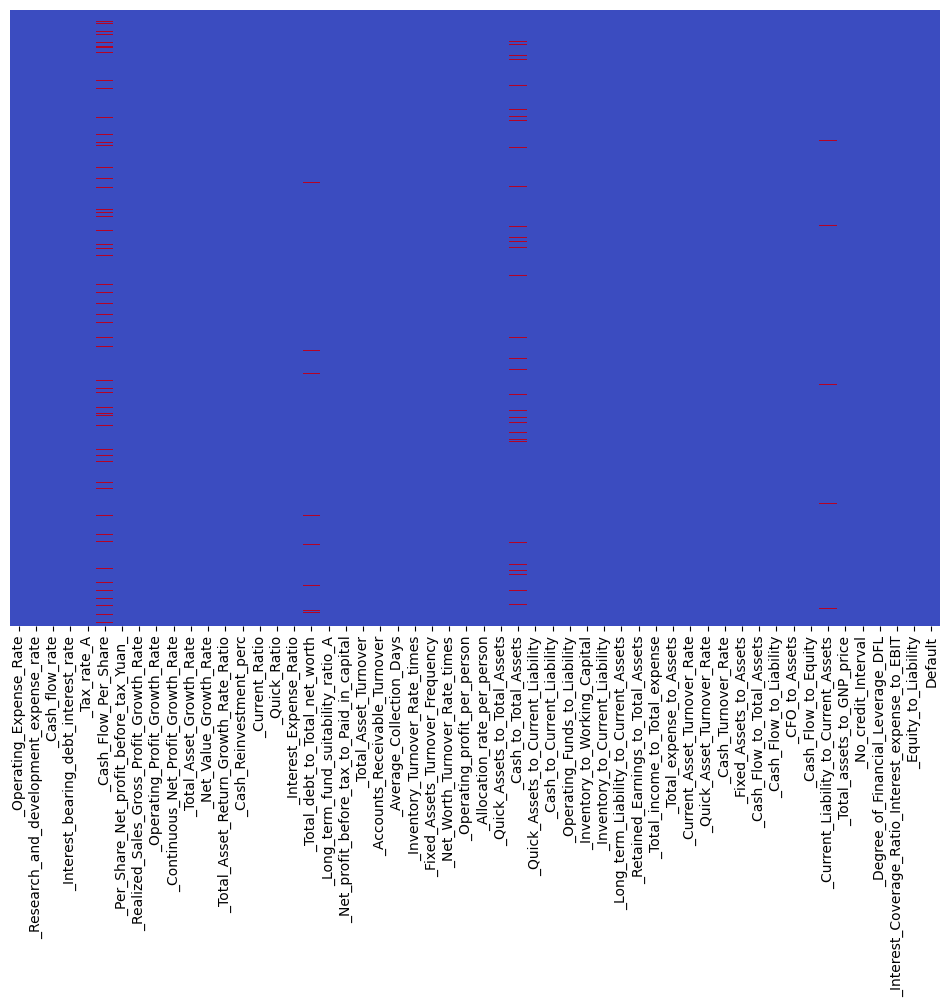

In [206]:
plt.figure(figsize = (12,8))
sns.heatmap(Company.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

#### Lets treat outliers using KNN Imputer


In [207]:
from sklearn.impute import KNNImputer

In [208]:
imputer = KNNImputer(n_neighbors=5)

In [209]:
Company_imputed = imputer.fit_transform(Company)

In [210]:
Company_imputed = pd.DataFrame(Company_imputed, columns=Company1.columns)

In [211]:
Company_imputed.isnull().sum()

_Operating_Expense_Rate                              0
_Research_and_development_expense_rate               0
_Cash_flow_rate                                      0
_Interest_bearing_debt_interest_rate                 0
_Tax_rate_A                                          0
_Cash_Flow_Per_Share                                 0
_Per_Share_Net_profit_before_tax_Yuan_               0
_Realized_Sales_Gross_Profit_Growth_Rate             0
_Operating_Profit_Growth_Rate                        0
_Continuous_Net_Profit_Growth_Rate                   0
_Total_Asset_Growth_Rate                             0
_Net_Value_Growth_Rate                               0
_Total_Asset_Return_Growth_Rate_Ratio                0
_Cash_Reinvestment_perc                              0
_Current_Ratio                                       0
_Quick_Ratio                                         0
_Interest_Expense_Ratio                              0
_Total_debt_to_Total_net_worth                       0
_Long_term

In [212]:
#pip install sci-analysis

In [213]:
from sci_analysis import analyze

Distribution of _Operating_Expense_Rate


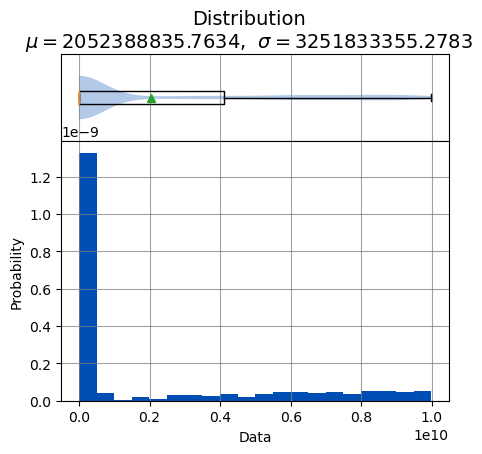



Statistics
----------

n         =  2058
Mean      =  2052388835.7634
Std Dev   =  3251833355.2783
Std Error =  71681254.3197
Skewness  =  1.2204
Kurtosis  = -0.1305
Maximum   =  9980000000.0000
75%       =  4110000000.0000
50%       =  0.0003
25%       =  0.0002
Minimum   =  0.0001
IQR       =  4109999999.9998
Range     =  9979999999.9999


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.6602
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Research_and_development_expense_rate


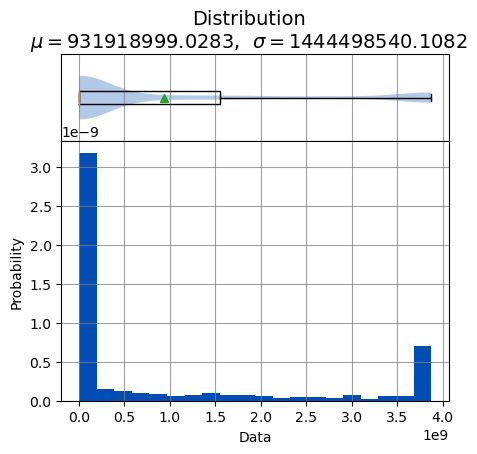



Statistics
----------

n         =  2058
Mean      =  931918999.0283
Std Dev   =  1444498540.1082
Std Error =  31841566.2506
Skewness  =  1.2321
Kurtosis  = -0.1764
Maximum   =  3875000000.0000
75%       =  1550000000.0000
50%       =  0.0002
25%       =  0.0000
Minimum   =  0.0000
IQR       =  1550000000.0000
Range     =  3875000000.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.6552
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Cash_flow_rate


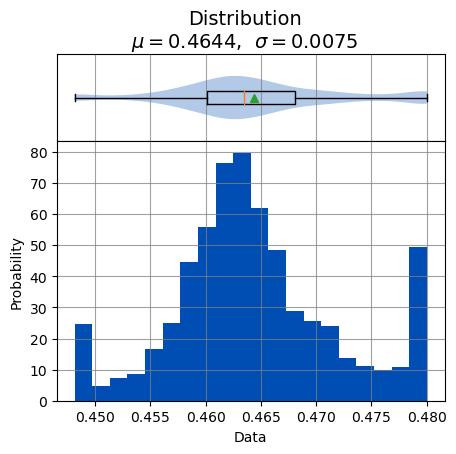



Statistics
----------

n         =  2058
Mean      =  0.4644
Std Dev   =  0.0075
Std Error =  0.0002
Skewness  =  0.3040
Kurtosis  =  0.0879
Maximum   =  0.4800
75%       =  0.4681
50%       =  0.4634
25%       =  0.4601
Minimum   =  0.4481
IQR       =  0.0080
Range     =  0.0319


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9600
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Interest_bearing_debt_interest_rate


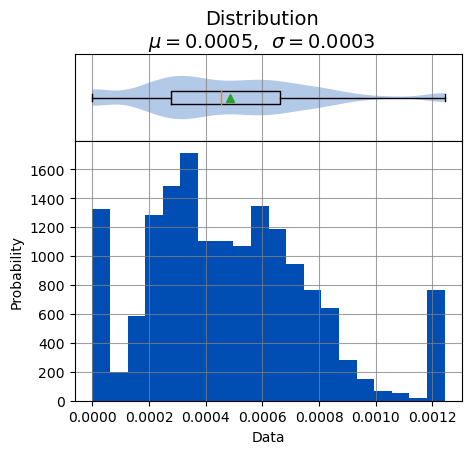



Statistics
----------

n         =  2058
Mean      =  0.0005
Std Dev   =  0.0003
Std Error =  0.0000
Skewness  =  0.5703
Kurtosis  =  0.2061
Maximum   =  0.0012
75%       =  0.0007
50%       =  0.0005
25%       =  0.0003
Minimum   =  0.0000
IQR       =  0.0004
Range     =  0.0012


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9598
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Tax_rate_A


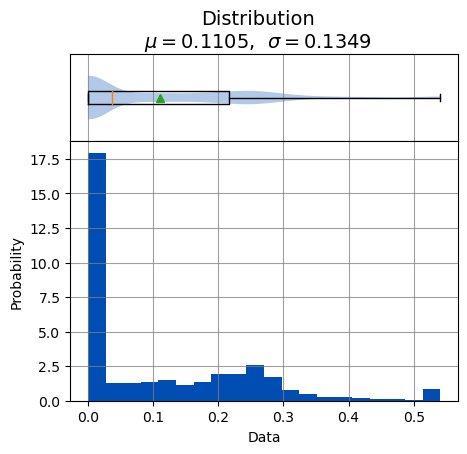



Statistics
----------

n         =  2058
Mean      =  0.1105
Std Dev   =  0.1349
Std Error =  0.0030
Skewness  =  1.1070
Kurtosis  =  0.6187
Maximum   =  0.5405
75%       =  0.2162
50%       =  0.0371
25%       =  0.0000
Minimum   =  0.0000
IQR       =  0.2162
Range     =  0.5405


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8006
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Cash_Flow_Per_Share


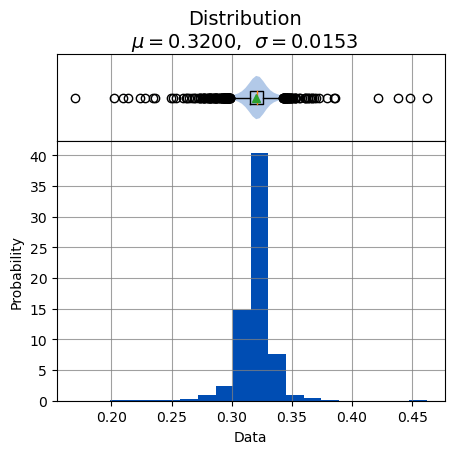



Statistics
----------

n         =  1891
Mean      =  0.3200
Std Dev   =  0.0153
Std Error =  0.0004
Skewness  = -0.6768
Kurtosis  =  22.0707
Maximum   =  0.4622
75%       =  0.3259
50%       =  0.3206
25%       =  0.3150
Minimum   =  0.1694
IQR       =  0.0109
Range     =  0.2928


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.7819
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Per_Share_Net_profit_before_tax_Yuan_


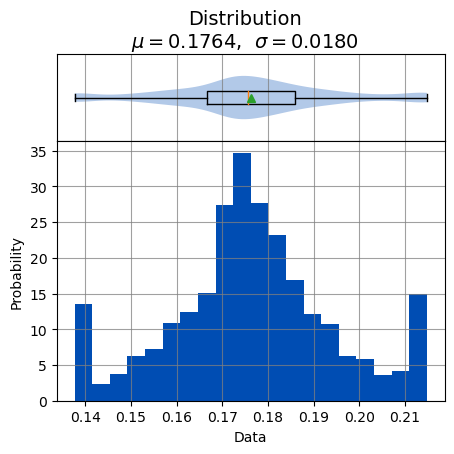



Statistics
----------

n         =  2058
Mean      =  0.1764
Std Dev   =  0.0180
Std Error =  0.0004
Skewness  =  0.0546
Kurtosis  =  0.0779
Maximum   =  0.2148
75%       =  0.1859
50%       =  0.1756
25%       =  0.1666
Minimum   =  0.1377
IQR       =  0.0193
Range     =  0.0771


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9733
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Realized_Sales_Gross_Profit_Growth_Rate


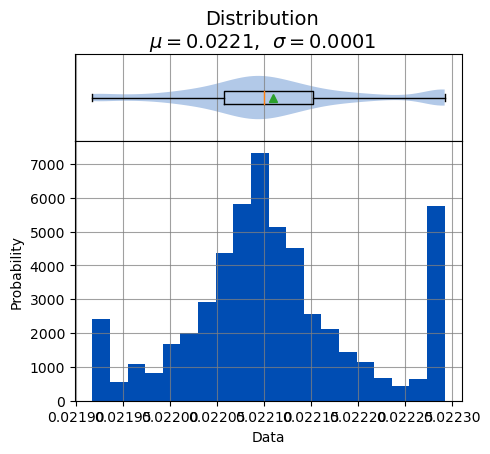



Statistics
----------

n         =  2058
Mean      =  0.0221
Std Dev   =  0.0001
Std Error =  0.0000
Skewness  =  0.2946
Kurtosis  = -0.0681
Maximum   =  0.0223
75%       =  0.0222
50%       =  0.0221
25%       =  0.0221
Minimum   =  0.0219
IQR       =  0.0001
Range     =  0.0004


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9519
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Operating_Profit_Growth_Rate


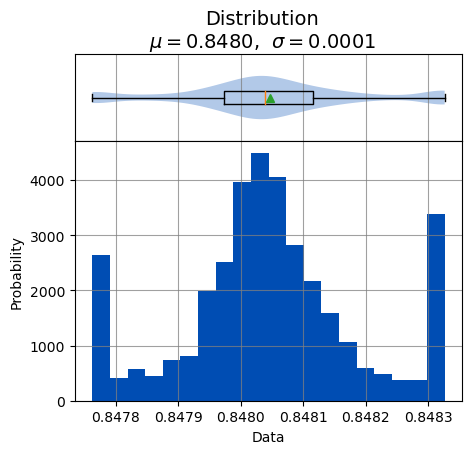



Statistics
----------

n         =  2058
Mean      =  0.8480
Std Dev   =  0.0001
Std Error =  0.0000
Skewness  =  0.1039
Kurtosis  = -0.0022
Maximum   =  0.8483
75%       =  0.8481
50%       =  0.8480
25%       =  0.8480
Minimum   =  0.8478
IQR       =  0.0001
Range     =  0.0006


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9517
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Continuous_Net_Profit_Growth_Rate


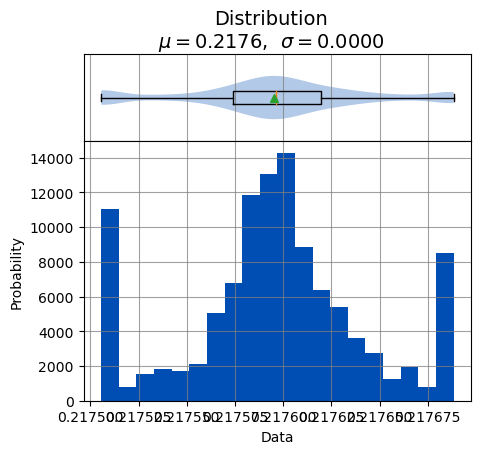



Statistics
----------

n         =  2058
Mean      =  0.2176
Std Dev   =  0.0000
Std Error =  0.0000
Skewness  = -0.0634
Kurtosis  = -0.0516
Maximum   =  0.2177
75%       =  0.2176
50%       =  0.2176
25%       =  0.2176
Minimum   =  0.2175
IQR       =  0.0000
Range     =  0.0002


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9511
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Total_Asset_Growth_Rate


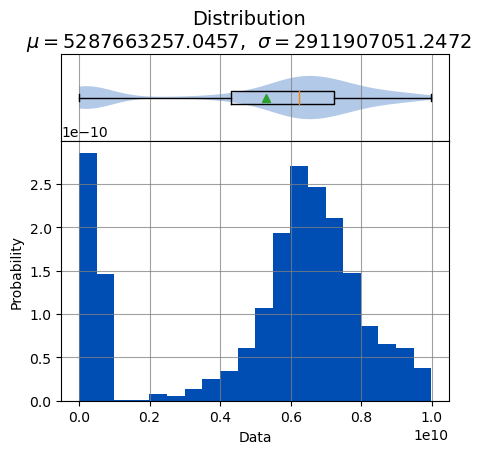



Statistics
----------

n         =  2058
Mean      =  5287663257.0457
Std Dev   =  2911907051.2472
Std Error =  64188144.6837
Skewness  = -0.8098
Kurtosis  = -0.6278
Maximum   =  9980000000.0000
75%       =  7220000000.0000
50%       =  6225000000.0000
25%       =  4315000000.0000
Minimum   =  0.0000
IQR       =  2905000000.0000
Range     =  9980000000.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8515
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Net_Value_Growth_Rate


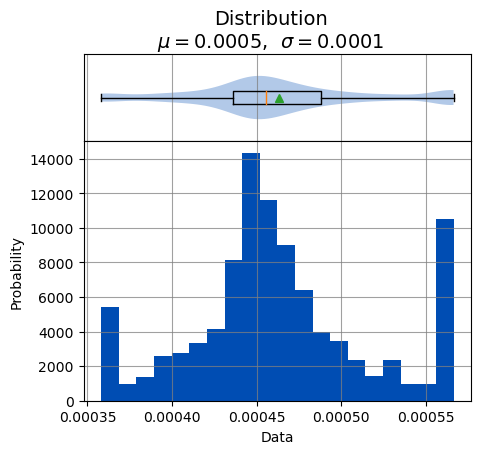



Statistics
----------

n         =  2058
Mean      =  0.0005
Std Dev   =  0.0001
Std Error =  0.0000
Skewness  =  0.2937
Kurtosis  = -0.1356
Maximum   =  0.0006
75%       =  0.0005
50%       =  0.0005
25%       =  0.0004
Minimum   =  0.0004
IQR       =  0.0001
Range     =  0.0002


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9470
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Total_Asset_Return_Growth_Rate_Ratio


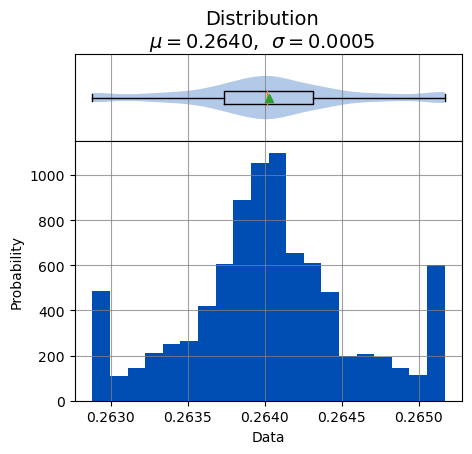



Statistics
----------

n         =  2058
Mean      =  0.2640
Std Dev   =  0.0005
Std Error =  0.0000
Skewness  =  0.0710
Kurtosis  =  0.0352
Maximum   =  0.2652
75%       =  0.2643
50%       =  0.2640
25%       =  0.2637
Minimum   =  0.2629
IQR       =  0.0006
Range     =  0.0023


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9681
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Cash_Reinvestment_perc


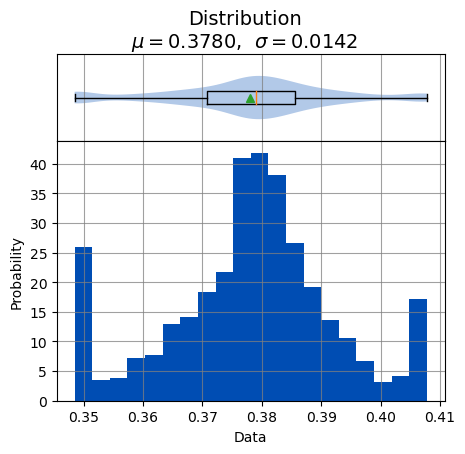



Statistics
----------

n         =  2058
Mean      =  0.3780
Std Dev   =  0.0142
Std Error =  0.0003
Skewness  = -0.1960
Kurtosis  =  0.0774
Maximum   =  0.4078
75%       =  0.3856
50%       =  0.3790
25%       =  0.3707
Minimum   =  0.3485
IQR       =  0.0148
Range     =  0.0593


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9648
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Current_Ratio


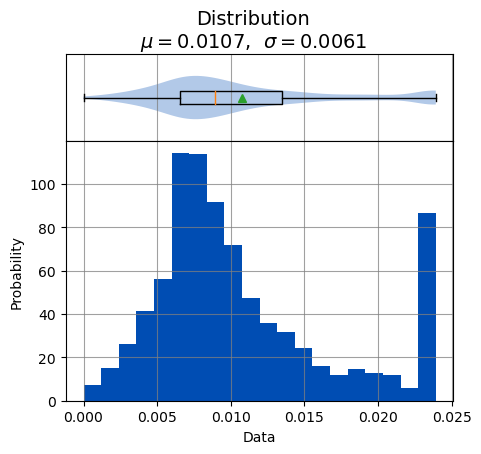



Statistics
----------

n         =  2058
Mean      =  0.0107
Std Dev   =  0.0061
Std Error =  0.0001
Skewness  =  0.9550
Kurtosis  = -0.0142
Maximum   =  0.0239
75%       =  0.0135
50%       =  0.0089
25%       =  0.0066
Minimum   =  0.0000
IQR       =  0.0069
Range     =  0.0239


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8863
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Quick_Ratio


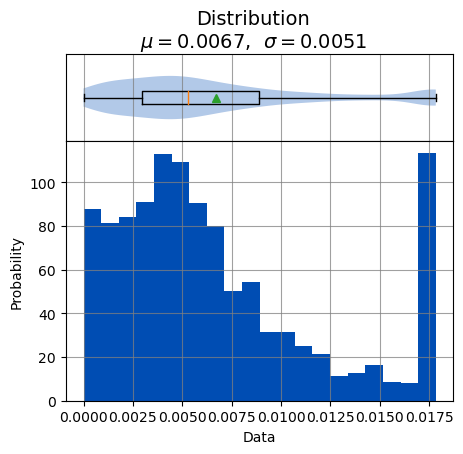



Statistics
----------

n         =  2058
Mean      =  0.0067
Std Dev   =  0.0051
Std Error =  0.0001
Skewness  =  0.9572
Kurtosis  = -0.0572
Maximum   =  0.0178
75%       =  0.0089
50%       =  0.0053
25%       =  0.0029
Minimum   =  0.0000
IQR       =  0.0060
Range     =  0.0178


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8832
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Interest_Expense_Ratio


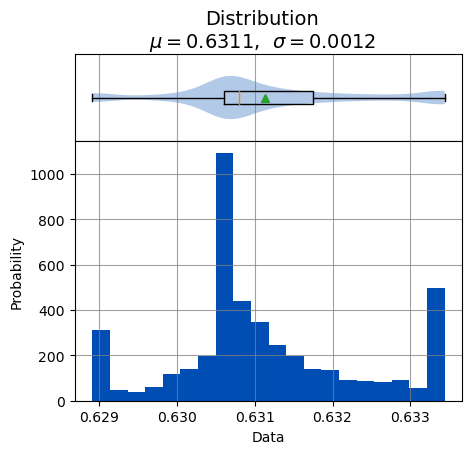



Statistics
----------

n         =  2058
Mean      =  0.6311
Std Dev   =  0.0012
Std Error =  0.0000
Skewness  =  0.3996
Kurtosis  = -0.2392
Maximum   =  0.6334
75%       =  0.6317
50%       =  0.6308
25%       =  0.6306
Minimum   =  0.6289
IQR       =  0.0011
Range     =  0.0045


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9245
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Total_debt_to_Total_net_worth


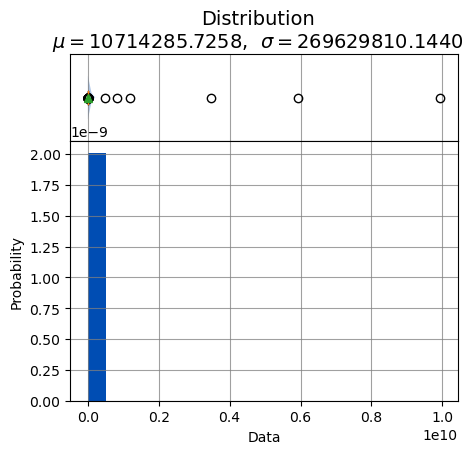



Statistics
----------

n         =  2037
Mean      =  10714285.7258
Std Dev   =  269629810.1440
Std Error =  5974098.6720
Skewness  =  30.8042
Kurtosis  =  1027.3908
Maximum   =  9940000000.0000
75%       =  0.0131
50%       =  0.0073
25%       =  0.0039
Minimum   =  0.0000
IQR       =  0.0091
Range     =  9940000000.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.0176
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Long_term_fund_suitability_ratio_A


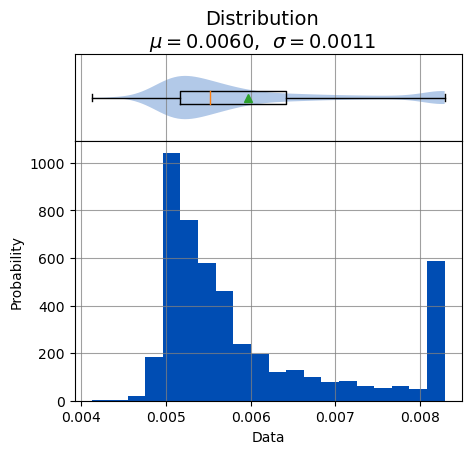



Statistics
----------

n         =  2058
Mean      =  0.0060
Std Dev   =  0.0011
Std Error =  0.0000
Skewness  =  1.1595
Kurtosis  = -0.0334
Maximum   =  0.0083
75%       =  0.0064
50%       =  0.0055
25%       =  0.0052
Minimum   =  0.0041
IQR       =  0.0013
Range     =  0.0042


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.7974
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Net_profit_before_tax_to_Paid_in_capital


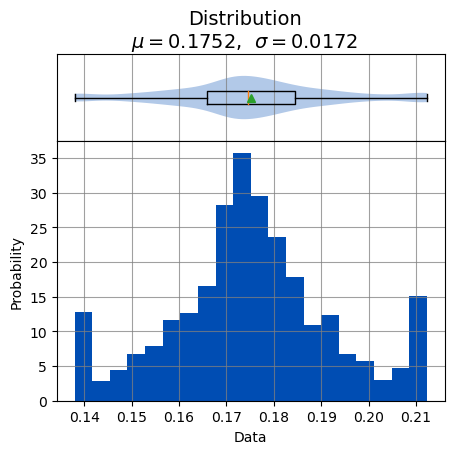



Statistics
----------

n         =  2058
Mean      =  0.1752
Std Dev   =  0.0172
Std Error =  0.0004
Skewness  =  0.0719
Kurtosis  =  0.0794
Maximum   =  0.2123
75%       =  0.1844
50%       =  0.1746
25%       =  0.1659
Minimum   =  0.1380
IQR       =  0.0186
Range     =  0.0743


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9753
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Total_Asset_Turnover


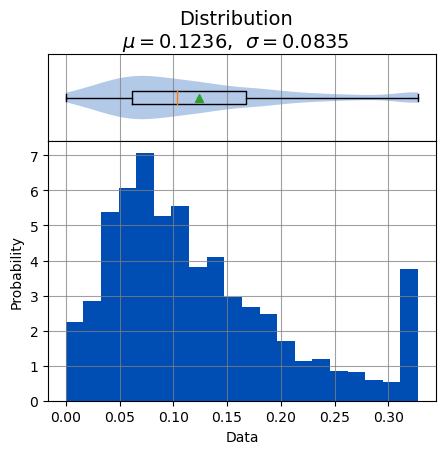



Statistics
----------

n         =  2058
Mean      =  0.1236
Std Dev   =  0.0835
Std Error =  0.0018
Skewness  =  0.9574
Kurtosis  =  0.2102
Maximum   =  0.3276
75%       =  0.1679
50%       =  0.1034
25%       =  0.0615
Minimum   =  0.0000
IQR       =  0.1064
Range     =  0.3276


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9107
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Accounts_Receivable_Turnover


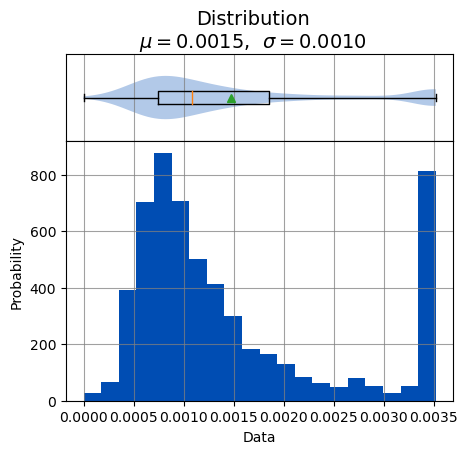



Statistics
----------

n         =  2058
Mean      =  0.0015
Std Dev   =  0.0010
Std Error =  0.0000
Skewness  =  1.0777
Kurtosis  = -0.1986
Maximum   =  0.0035
75%       =  0.0019
50%       =  0.0011
25%       =  0.0007
Minimum   =  0.0000
IQR       =  0.0011
Range     =  0.0035


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8159
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Average_Collection_Days


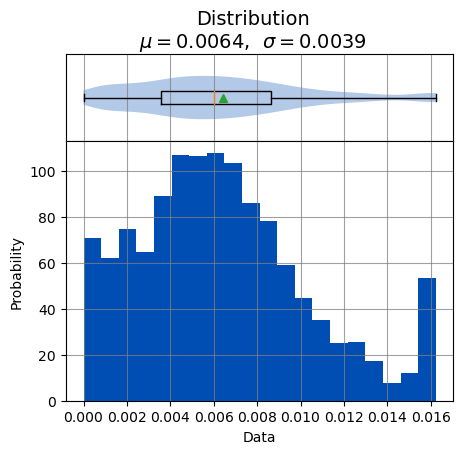



Statistics
----------

n         =  2058
Mean      =  0.0064
Std Dev   =  0.0039
Std Error =  0.0001
Skewness  =  0.6330
Kurtosis  = -0.0021
Maximum   =  0.0162
75%       =  0.0086
50%       =  0.0060
25%       =  0.0036
Minimum   =  0.0000
IQR       =  0.0051
Range     =  0.0162


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9584
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Inventory_Turnover_Rate_times


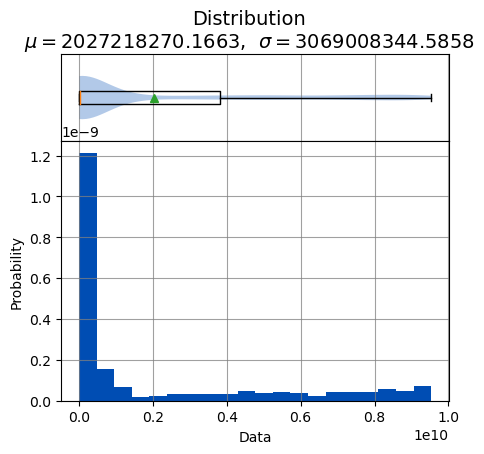



Statistics
----------

n         =  2058
Mean      =  2027218270.1663
Std Dev   =  3069008344.5858
Std Error =  67651181.2330
Skewness  =  1.2623
Kurtosis  =  0.0506
Maximum   =  9537499999.9997
75%       =  3815000000.0000
50%       =  19100000.0000
25%       =  0.0002
Minimum   =  0.0000
IQR       =  3814999999.9998
Range     =  9537499999.9997


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.6907
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Fixed_Assets_Turnover_Frequency


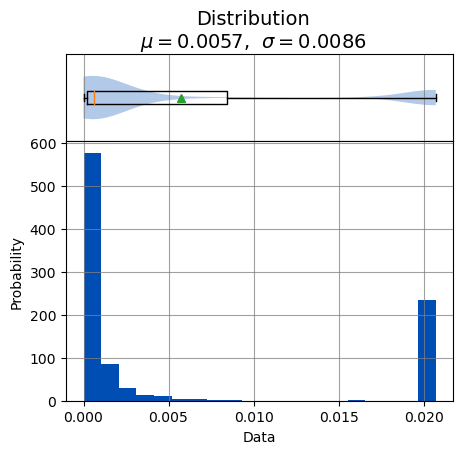



Statistics
----------

n         =  2058
Mean      =  0.0057
Std Dev   =  0.0086
Std Error =  0.0002
Skewness  =  1.1316
Kurtosis  = -0.6674
Maximum   =  0.0207
75%       =  0.0084
50%       =  0.0006
25%       =  0.0002
Minimum   =  0.0000
IQR       =  0.0082
Range     =  0.0207


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.5996
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Net_Worth_Turnover_Rate_times


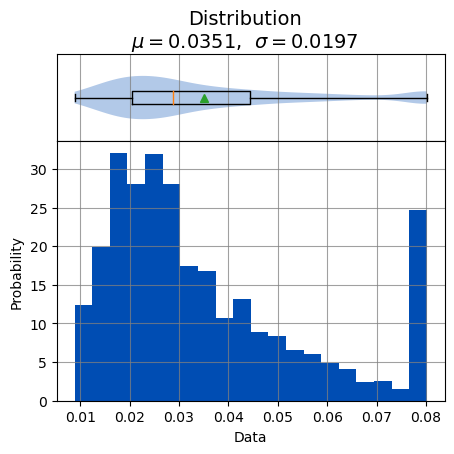



Statistics
----------

n         =  2058
Mean      =  0.0351
Std Dev   =  0.0197
Std Error =  0.0004
Skewness  =  1.0382
Kurtosis  =  0.1052
Maximum   =  0.0802
75%       =  0.0444
50%       =  0.0287
25%       =  0.0205
Minimum   =  0.0089
IQR       =  0.0239
Range     =  0.0713


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8757
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Operating_profit_per_person


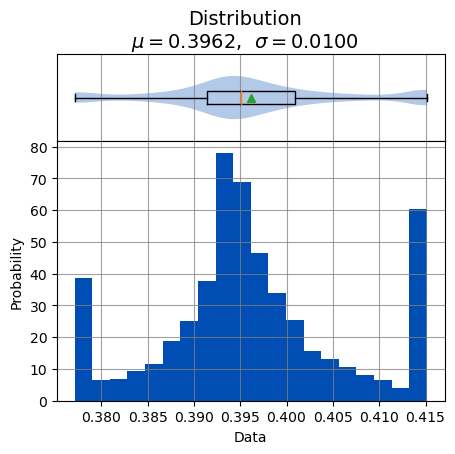



Statistics
----------

n         =  2058
Mean      =  0.3962
Std Dev   =  0.0100
Std Error =  0.0002
Skewness  =  0.2230
Kurtosis  = -0.1592
Maximum   =  0.4152
75%       =  0.4009
50%       =  0.3951
25%       =  0.3914
Minimum   =  0.3771
IQR       =  0.0095
Range     =  0.0380


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9432
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Allocation_rate_per_person


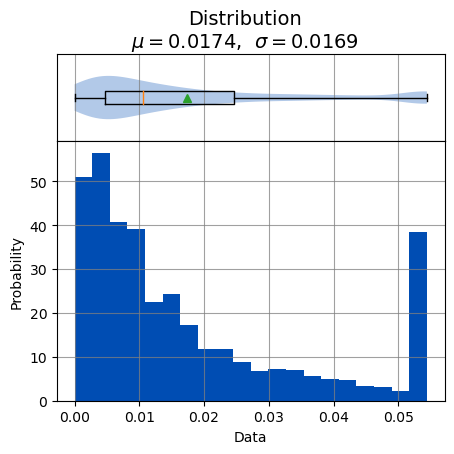



Statistics
----------

n         =  2058
Mean      =  0.0174
Std Dev   =  0.0169
Std Error =  0.0004
Skewness  =  1.1356
Kurtosis  =  0.0271
Maximum   =  0.0544
75%       =  0.0246
50%       =  0.0106
25%       =  0.0047
Minimum   =  0.0000
IQR       =  0.0199
Range     =  0.0544


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8191
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Quick_Assets_to_Total_Assets


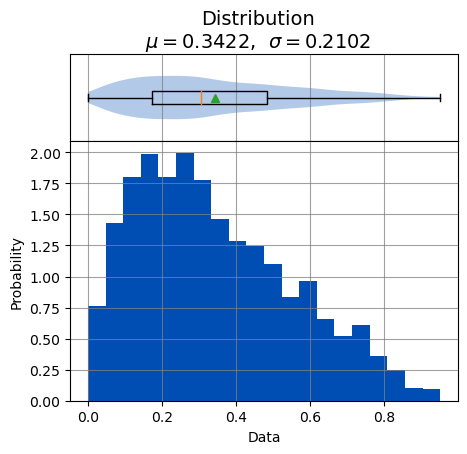



Statistics
----------

n         =  2058
Mean      =  0.3422
Std Dev   =  0.2102
Std Error =  0.0046
Skewness  =  0.5790
Kurtosis  = -0.4513
Maximum   =  0.9511
75%       =  0.4845
50%       =  0.3061
25%       =  0.1735
Minimum   =  0.0000
IQR       =  0.3111
Range     =  0.9511


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9571
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Cash_to_Total_Assets


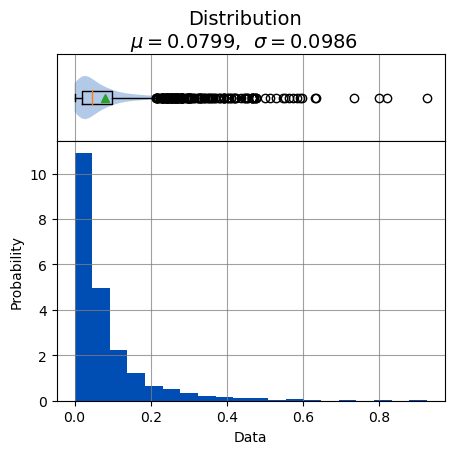



Statistics
----------

n         =  1962
Mean      =  0.0799
Std Dev   =  0.0986
Std Error =  0.0022
Skewness  =  2.8951
Kurtosis  =  11.7866
Maximum   =  0.9250
75%       =  0.0977
50%       =  0.0456
25%       =  0.0206
Minimum   =  0.0002
IQR       =  0.0771
Range     =  0.9248


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.6960
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Quick_Assets_to_Current_Liability


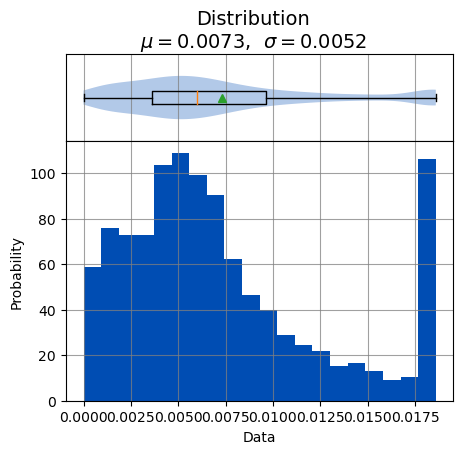



Statistics
----------

n         =  2058
Mean      =  0.0073
Std Dev   =  0.0052
Std Error =  0.0001
Skewness  =  0.9089
Kurtosis  = -0.0998
Maximum   =  0.0186
75%       =  0.0096
50%       =  0.0060
25%       =  0.0036
Minimum   =  0.0000
IQR       =  0.0060
Range     =  0.0186


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8945
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Cash_to_Current_Liability


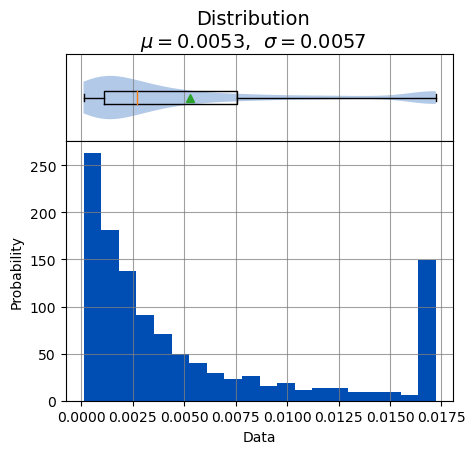



Statistics
----------

n         =  2058
Mean      =  0.0053
Std Dev   =  0.0057
Std Error =  0.0001
Skewness  =  1.1933
Kurtosis  = -0.0206
Maximum   =  0.0172
75%       =  0.0075
50%       =  0.0027
25%       =  0.0011
Minimum   =  0.0001
IQR       =  0.0065
Range     =  0.0171


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.7727
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Operating_Funds_to_Liability


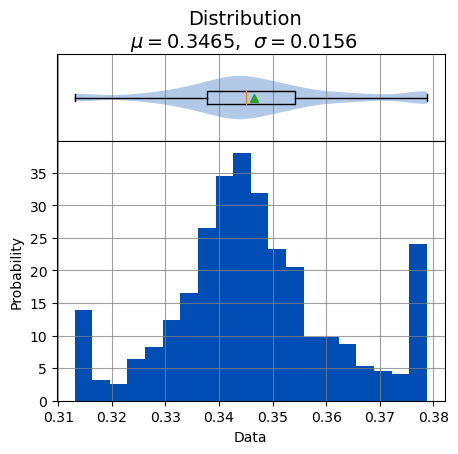



Statistics
----------

n         =  2058
Mean      =  0.3465
Std Dev   =  0.0156
Std Error =  0.0003
Skewness  =  0.2224
Kurtosis  =  0.0848
Maximum   =  0.3788
75%       =  0.3541
50%       =  0.3450
25%       =  0.3377
Minimum   =  0.3130
IQR       =  0.0164
Range     =  0.0657


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9632
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Inventory_to_Working_Capital


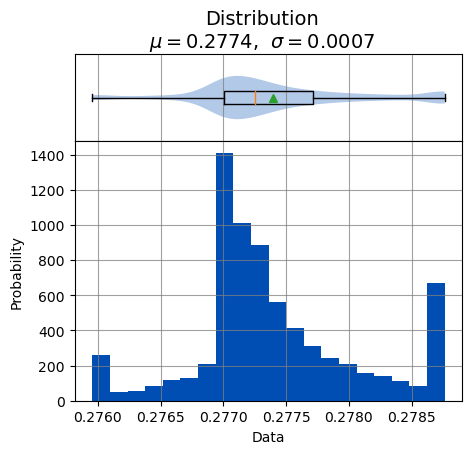



Statistics
----------

n         =  2058
Mean      =  0.2774
Std Dev   =  0.0007
Std Error =  0.0000
Skewness  =  0.4545
Kurtosis  =  0.1795
Maximum   =  0.2788
75%       =  0.2777
50%       =  0.2773
25%       =  0.2770
Minimum   =  0.2760
IQR       =  0.0007
Range     =  0.0028


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9272
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Inventory_to_Current_Liability


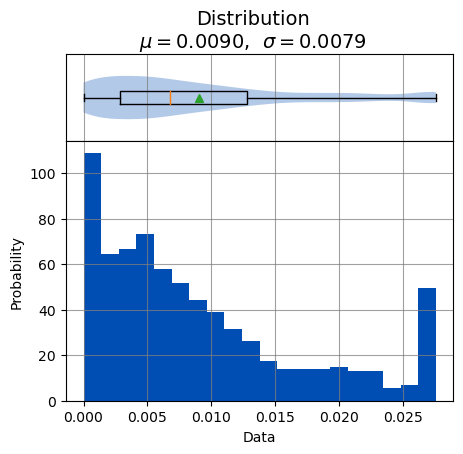



Statistics
----------

n         =  2058
Mean      =  0.0090
Std Dev   =  0.0079
Std Error =  0.0002
Skewness  =  0.9972
Kurtosis  =  0.0197
Maximum   =  0.0275
75%       =  0.0128
50%       =  0.0068
25%       =  0.0029
Minimum   =  0.0000
IQR       =  0.0099
Range     =  0.0275


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8799
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Long_term_Liability_to_Current_Assets


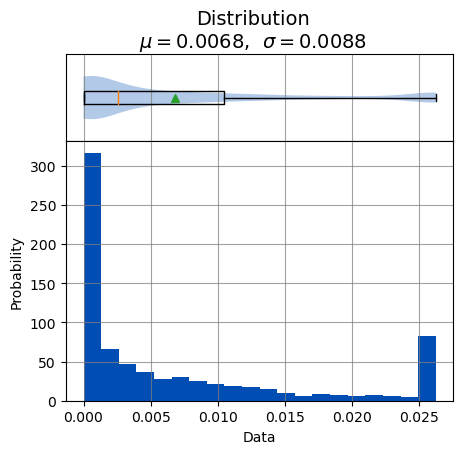



Statistics
----------

n         =  2058
Mean      =  0.0068
Std Dev   =  0.0088
Std Error =  0.0002
Skewness  =  1.2350
Kurtosis  =  0.1594
Maximum   =  0.0262
75%       =  0.0105
50%       =  0.0026
25%       =  0.0000
Minimum   =  0.0000
IQR       =  0.0105
Range     =  0.0262


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.7560
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Retained_Earnings_to_Total_Assets


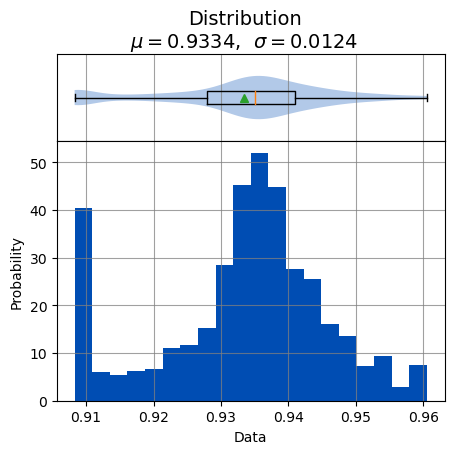



Statistics
----------

n         =  2058
Mean      =  0.9334
Std Dev   =  0.0124
Std Error =  0.0003
Skewness  = -0.4701
Kurtosis  = -0.1039
Maximum   =  0.9605
75%       =  0.9409
50%       =  0.9351
25%       =  0.9279
Minimum   =  0.9083
IQR       =  0.0131
Range     =  0.0522


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9460
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Total_income_to_Total_expense


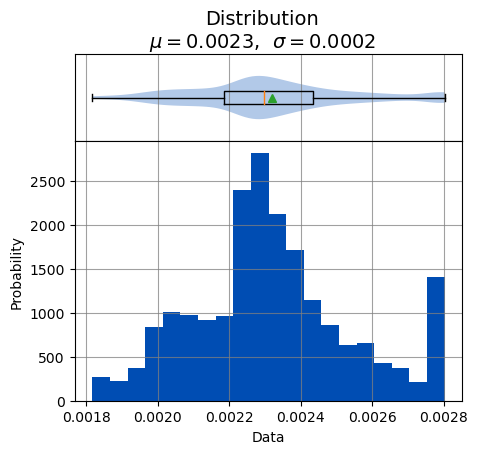



Statistics
----------

n         =  2058
Mean      =  0.0023
Std Dev   =  0.0002
Std Error =  0.0000
Skewness  =  0.3498
Kurtosis  = -0.0785
Maximum   =  0.0028
75%       =  0.0024
50%       =  0.0023
25%       =  0.0022
Minimum   =  0.0018
IQR       =  0.0002
Range     =  0.0010


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9708
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Total_expense_to_Assets


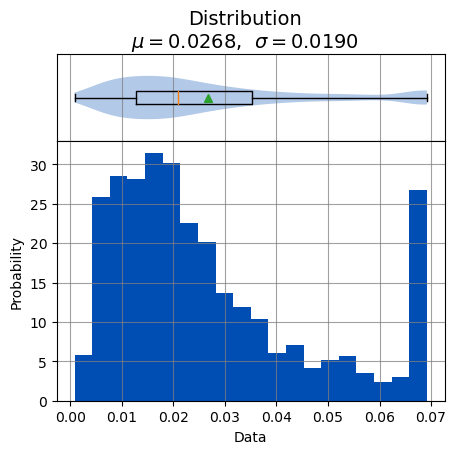



Statistics
----------

n         =  2058
Mean      =  0.0268
Std Dev   =  0.0190
Std Error =  0.0004
Skewness  =  1.0270
Kurtosis  =  0.0197
Maximum   =  0.0692
75%       =  0.0353
50%       =  0.0209
25%       =  0.0127
Minimum   =  0.0009
IQR       =  0.0226
Range     =  0.0683


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8708
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Current_Asset_Turnover_Rate


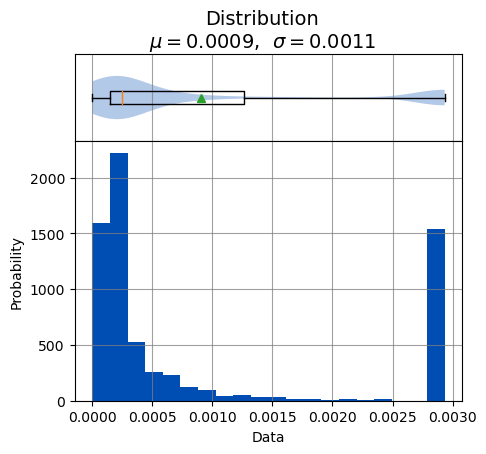



Statistics
----------

n         =  2058
Mean      =  0.0009
Std Dev   =  0.0011
Std Error =  0.0000
Skewness  =  1.1420
Kurtosis  = -0.5597
Maximum   =  0.0029
75%       =  0.0013
50%       =  0.0002
25%       =  0.0002
Minimum   =  0.0000
IQR       =  0.0011
Range     =  0.0029


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.6446
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Quick_Asset_Turnover_Rate


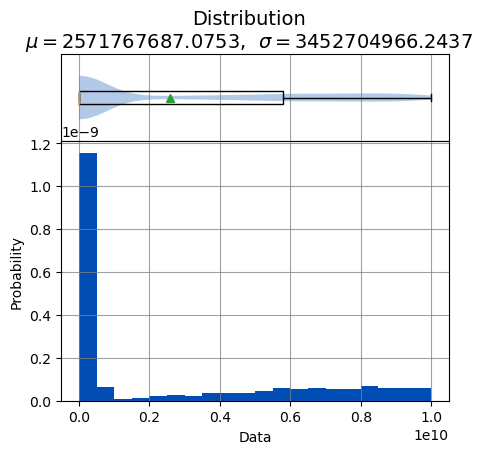



Statistics
----------

n         =  2058
Mean      =  2571767687.0753
Std Dev   =  3452704966.2437
Std Error =  76109134.6746
Skewness  =  0.8585
Kurtosis  = -0.9166
Maximum   =  10000000000.0000
75%       =  5790000000.0000
50%       =  0.0004
25%       =  0.0002
Minimum   =  0.0000
IQR       =  5789999999.9998
Range     =  10000000000.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.7275
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Cash_Turnover_Rate


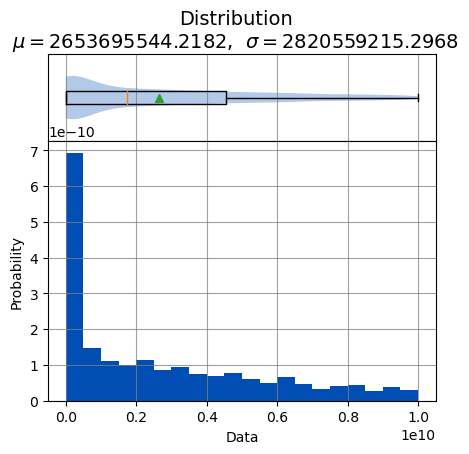



Statistics
----------

n         =  2058
Mean      =  2653695544.2182
Std Dev   =  2820559215.2968
Std Error =  62174533.6695
Skewness  =  0.8917
Kurtosis  = -0.3389
Maximum   =  9990000000.0000
75%       =  4550000000.0000
50%       =  1730000000.0000
25%       =  0.0017
Minimum   =  0.0001
IQR       =  4549999999.9983
Range     =  9989999999.9999


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8565
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Fixed_Assets_to_Assets


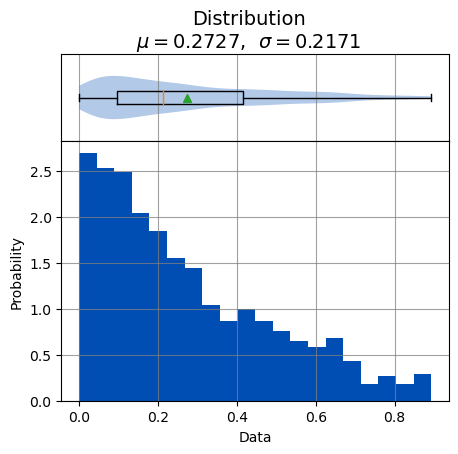



Statistics
----------

n         =  2058
Mean      =  0.2727
Std Dev   =  0.2171
Std Error =  0.0048
Skewness  =  0.8579
Kurtosis  = -0.1359
Maximum   =  0.8928
75%       =  0.4150
50%       =  0.2138
25%       =  0.0965
Minimum   =  0.0000
IQR       =  0.3185
Range     =  0.8928


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9132
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Cash_Flow_to_Total_Assets


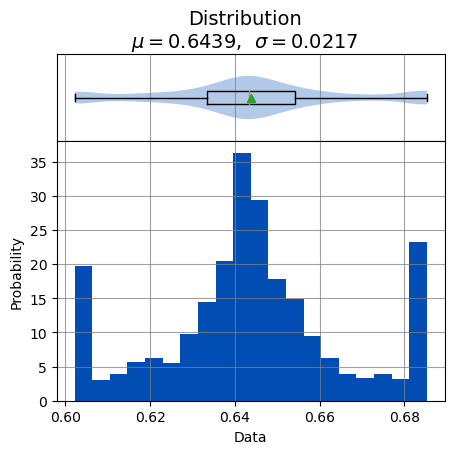



Statistics
----------

n         =  2058
Mean      =  0.6439
Std Dev   =  0.0217
Std Error =  0.0005
Skewness  =  0.0591
Kurtosis  = -0.1590
Maximum   =  0.6853
75%       =  0.6542
50%       =  0.6432
25%       =  0.6334
Minimum   =  0.6022
IQR       =  0.0208
Range     =  0.0832


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9523
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Cash_Flow_to_Liability


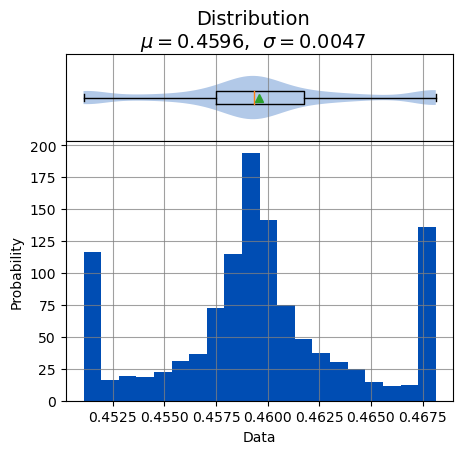



Statistics
----------

n         =  2058
Mean      =  0.4596
Std Dev   =  0.0047
Std Error =  0.0001
Skewness  =  0.0882
Kurtosis  = -0.2467
Maximum   =  0.4681
75%       =  0.4617
50%       =  0.4593
25%       =  0.4575
Minimum   =  0.4511
IQR       =  0.0043
Range     =  0.0171


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9381
p value =  0.0000

HA: Data is not normally distributed

Distribution of _CFO_to_Assets


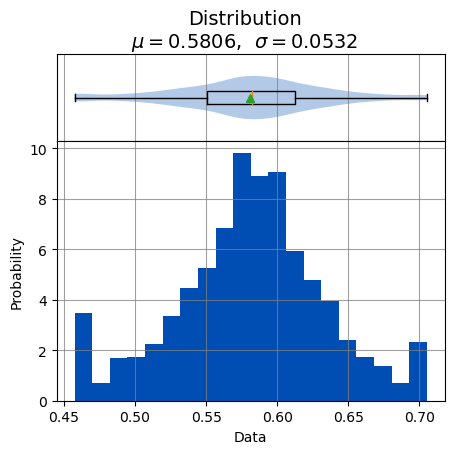



Statistics
----------

n         =  2058
Mean      =  0.5806
Std Dev   =  0.0532
Std Error =  0.0012
Skewness  = -0.1488
Kurtosis  =  0.1506
Maximum   =  0.7052
75%       =  0.6123
50%       =  0.5825
25%       =  0.5504
Minimum   =  0.4575
IQR       =  0.0619
Range     =  0.2478


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9841
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Cash_Flow_to_Equity


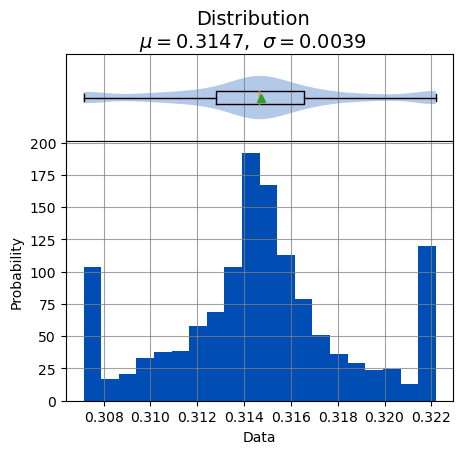



Statistics
----------

n         =  2058
Mean      =  0.3147
Std Dev   =  0.0039
Std Error =  0.0001
Skewness  =  0.0451
Kurtosis  = -0.1438
Maximum   =  0.3222
75%       =  0.3165
50%       =  0.3146
25%       =  0.3128
Minimum   =  0.3071
IQR       =  0.0038
Range     =  0.0151


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9566
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Current_Liability_to_Current_Assets


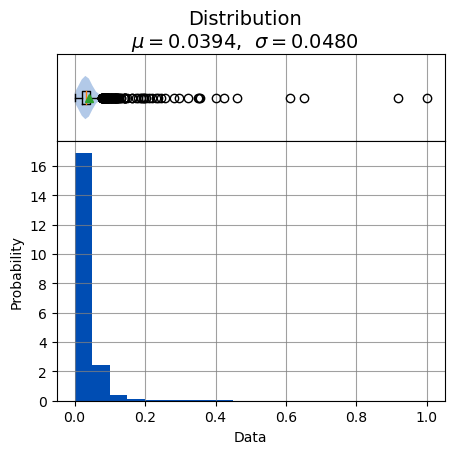



Statistics
----------

n         =  2044
Mean      =  0.0394
Std Dev   =  0.0480
Std Error =  0.0011
Skewness  =  10.6365
Kurtosis  =  165.3412
Maximum   =  1.0000
75%       =  0.0439
50%       =  0.0327
25%       =  0.0218
Minimum   =  0.0000
IQR       =  0.0222
Range     =  1.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.3874
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Total_assets_to_GNP_price


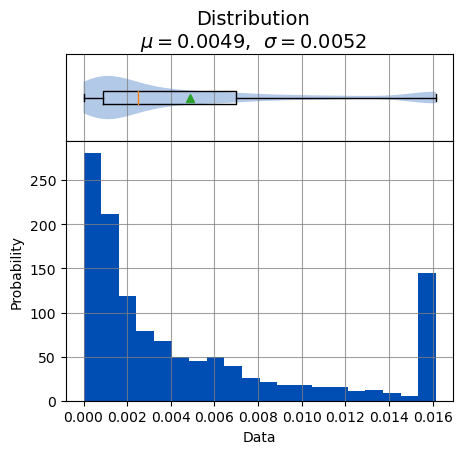



Statistics
----------

n         =  2058
Mean      =  0.0049
Std Dev   =  0.0052
Std Error =  0.0001
Skewness  =  1.1718
Kurtosis  =  0.0114
Maximum   =  0.0161
75%       =  0.0070
50%       =  0.0025
25%       =  0.0009
Minimum   =  0.0000
IQR       =  0.0061
Range     =  0.0161


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.7860
p value =  0.0000

HA: Data is not normally distributed

Distribution of _No_credit_Interval


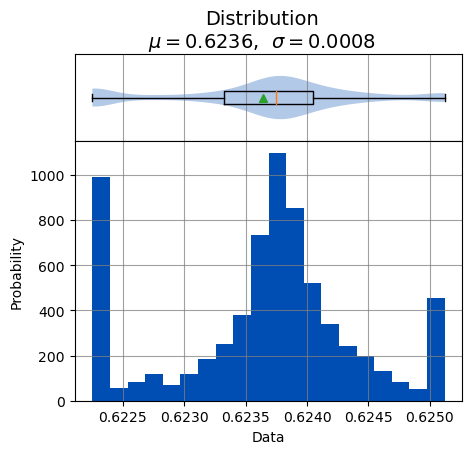



Statistics
----------

n         =  2058
Mean      =  0.6236
Std Dev   =  0.0008
Std Error =  0.0000
Skewness  = -0.2956
Kurtosis  = -0.2521
Maximum   =  0.6251
75%       =  0.6240
50%       =  0.6237
25%       =  0.6233
Minimum   =  0.6223
IQR       =  0.0007
Range     =  0.0029


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9277
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Degree_of_Financial_Leverage_DFL


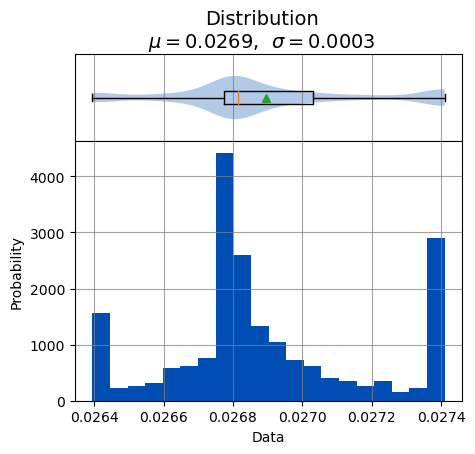



Statistics
----------

n         =  2058
Mean      =  0.0269
Std Dev   =  0.0003
Std Error =  0.0000
Skewness  =  0.4205
Kurtosis  = -0.3811
Maximum   =  0.0274
75%       =  0.0270
50%       =  0.0268
25%       =  0.0268
Minimum   =  0.0264
IQR       =  0.0003
Range     =  0.0010


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9072
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Interest_Coverage_Ratio_Interest_expense_to_EBIT


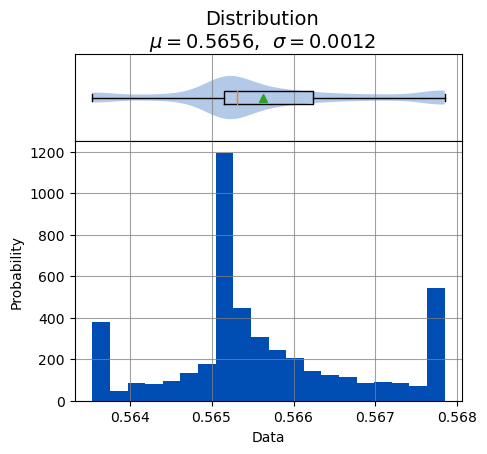



Statistics
----------

n         =  2058
Mean      =  0.5656
Std Dev   =  0.0012
Std Error =  0.0000
Skewness  =  0.3751
Kurtosis  = -0.3375
Maximum   =  0.5678
75%       =  0.5662
50%       =  0.5653
25%       =  0.5652
Minimum   =  0.5635
IQR       =  0.0011
Range     =  0.0043


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.9235
p value =  0.0000

HA: Data is not normally distributed

Distribution of _Equity_to_Liability


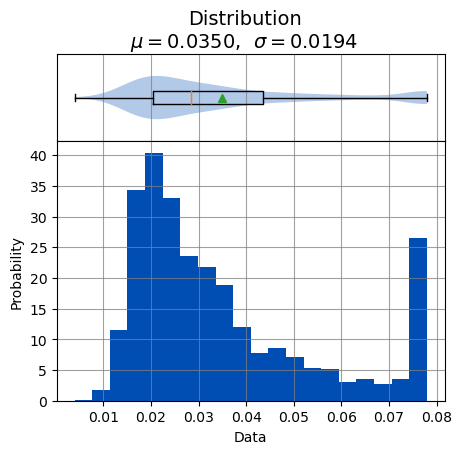



Statistics
----------

n         =  2058
Mean      =  0.0350
Std Dev   =  0.0194
Std Error =  0.0004
Skewness  =  1.0974
Kurtosis  =  0.0544
Maximum   =  0.0780
75%       =  0.0434
50%       =  0.0285
25%       =  0.0204
Minimum   =  0.0039
IQR       =  0.0230
Range     =  0.0740


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.8456
p value =  0.0000

HA: Data is not normally distributed

Distribution of Default


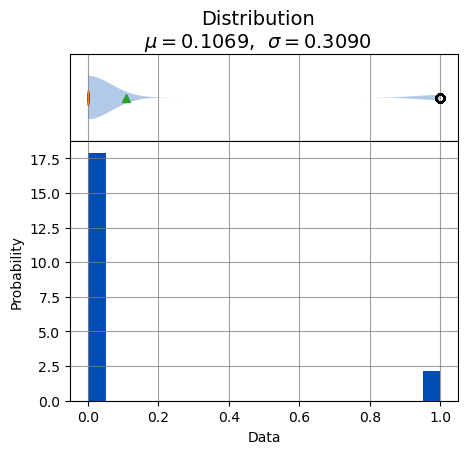



Statistics
----------

n         =  2058
Mean      =  0.1069
Std Dev   =  0.3090
Std Error =  0.0068
Skewness  =  2.5445
Kurtosis  =  4.4742
Maximum   =  1.0000
75%       =  0.0000
50%       =  0.0000
25%       =  0.0000
Minimum   =  0.0000
IQR       =  0.0000
Range     =  1.0000


Shapiro-Wilk test for normality
-------------------------------

alpha   =  0.0500
W value =  0.3553
p value =  0.0000

HA: Data is not normally distributed



In [214]:
for column in Company_imputed.columns:
    if Company[column].dtype != 'object':
        print("Distribution of " + str (column))
        analyze(Company[column])

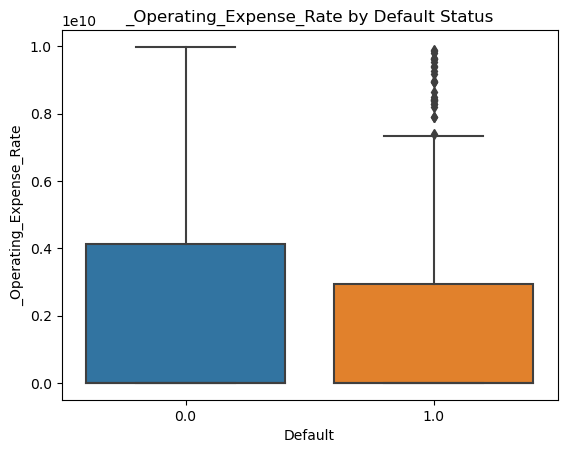

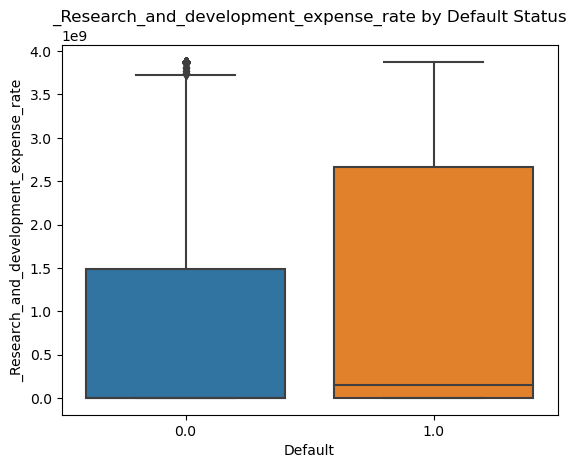

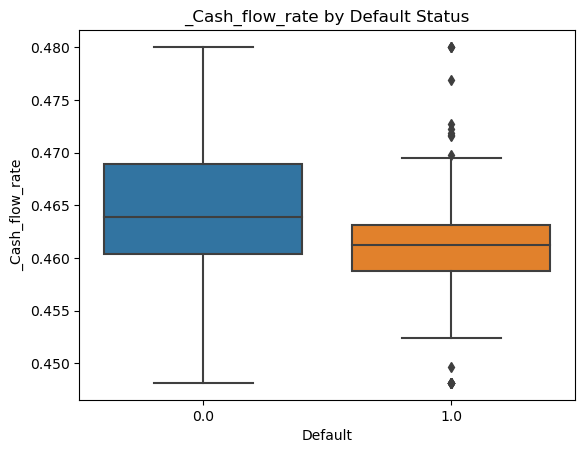

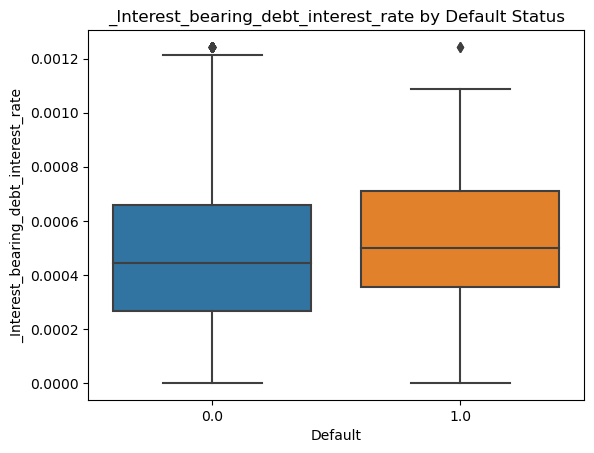

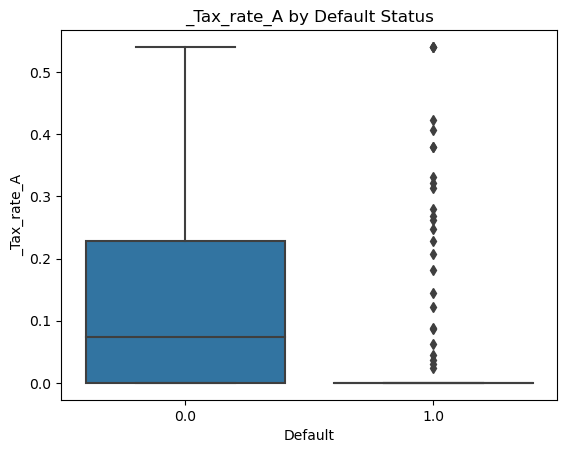

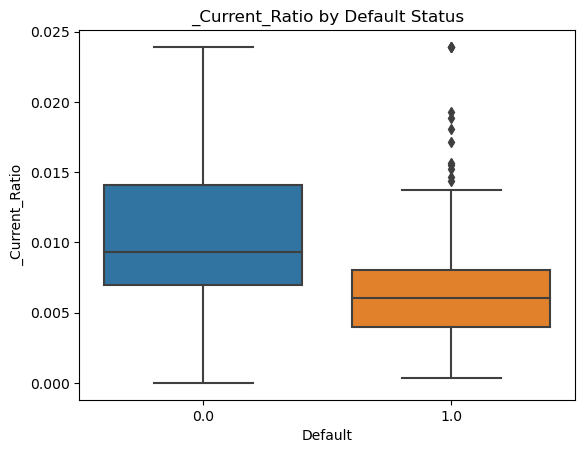

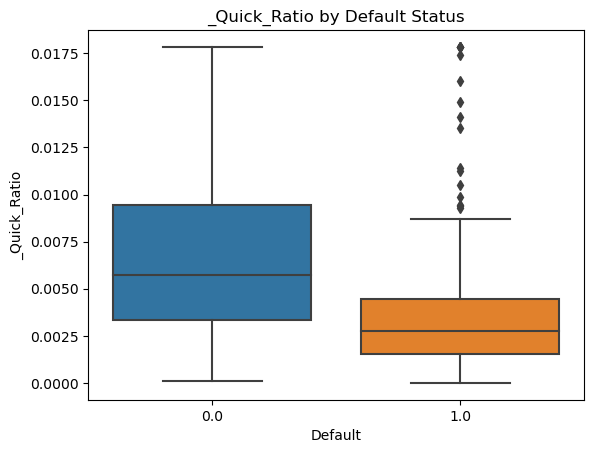

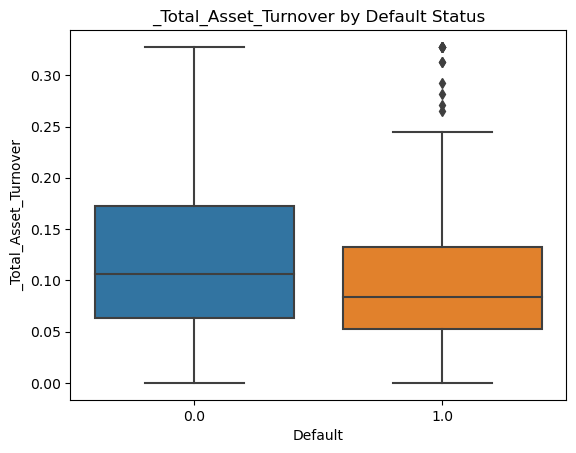

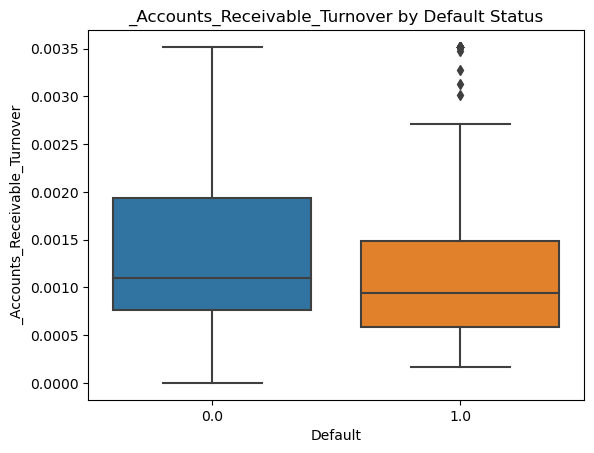

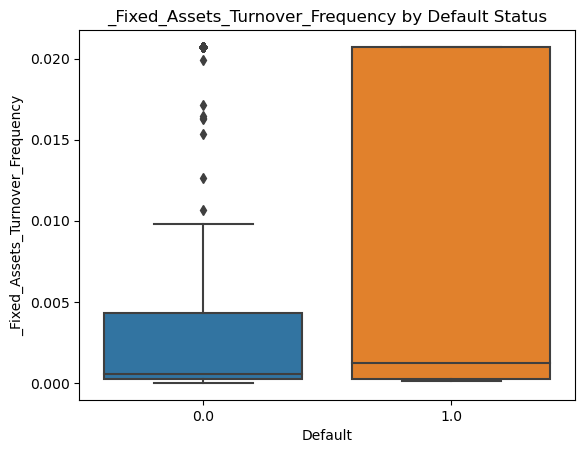

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected variables for bivariate analysis
selected_variables = [
    '_Operating_Expense_Rate', 
    '_Research_and_development_expense_rate', 
    '_Cash_flow_rate', 
    '_Interest_bearing_debt_interest_rate', 
    '_Tax_rate_A', 
    '_Current_Ratio', 
    '_Quick_Ratio', 
    '_Total_Asset_Turnover', 
    '_Accounts_Receivable_Turnover', 
    '_Fixed_Assets_Turnover_Frequency'
]

# Plot boxplots for selected variables by Default status
for column in selected_variables:
    sns.boxplot(data=Company_imputed, x='Default', y=column)
    plt.title(f'{column} by Default Status')
    plt.xlabel('Default')
    plt.ylabel(column)
    plt.show()





In [216]:
print(Company_imputed.columns)

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to

In [322]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

<Axes: >

# Model Building using Logistic Regression for 'Probability at default'
The equation of the Logistic Regression by which we predict the corresponding probabilities and then go on predict a discrete target variable is


y = 11+𝑒−𝑧

Note: z = 𝛽0
 
 +∑𝑛𝑖=1(𝛽𝑖𝑋1)

Now, Importing statsmodels modules

Creating logistic regression equation & storing it in f_1

In [218]:
import statsmodels.formula.api as SM

## Model 1
Lets check all columns we have in the dataset



In [219]:
Company_imputed.columns

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to

In [220]:
f_1 = 'Default ~_Operating_Expense_Rate+ _Research_and_development_expense_rate+_Cash_flow_rate+_Operating_Profit_Growth_Rate+_Total_Asset_Growth_Rate+_Interest_Expense_Ratio+_Inventory_Turnover_Rate_times+_Quick_Assets_to_Total_Assets+_Retained_Earnings_to_Total_Assets+_Quick_Asset_Turnover_Rate+_Cash_Turnover_Rate+_Cash_Flow_to_Total_Assets+_CFO_to_Assets+_No_credit_Interval+_Interest_Coverage_Ratio_Interest_expense_to_EBIT'

In [221]:
model_1 = SM.logit(formula = f_1, data=Company_imputed).fit()

Optimization terminated successfully.
         Current function value: 0.237841
         Iterations 16


In [222]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 2058
Model:                          Logit   Df Residuals:                     2042
Method:                           MLE   Df Model:                           15
Date:                Sat, 06 Apr 2024   Pseudo R-squ.:                  0.3004
Time:                        15:58:17   Log-Likelihood:                -489.48
converged:                       True   LL-Null:                       -699.69
Covariance Type:            nonrobust   LLR p-value:                 3.511e-80
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          1190.6546    494.209      2.409      0.016     222.022    2159.287
_Operating_Expense_Rate                            8.166e-11   2.72e-11      3.006      0.003    2.84e-11    1.35e-10
_Research_and_development_expense_rate             2.119e-10   5.74e-11      3.691      0.000    9.94e-11    3.24e-10
_Cash_flow_rate                                      -1.2015     26.962     -0.045      0.964     -54.046      51.643
_Operating_Profit_Growth_Rate                     -1025.3440    583.638     -1.757      0.079   -2169.254     118.566
_Total_Asset_Growth_Rate                           6.969e-12    3.4e-11      0.205      0.837   -5.96e-11    7.35e-11
_Interest_Expense_Ratio                             -43.1602    133.447     -0.323      0.746    -304.712     218.392
_Inventory_Turnover_Rate_times                    -2.913e-11   2.89e-11     -1.009      0.313   -8.57e-11    2.75e-11
_Quick_Assets_to_Total_Assets                        -1.2260      0.468     -2.617      0.009      -2.144      -0.308
_Retained_Earnings_to_Total_Assets                 -112.3859      8.419    -13.349      0.000    -128.887     -95.885
_Quick_Asset_Turnover_Rate                         1.562e-12    2.5e-11      0.063      0.950   -4.74e-11    5.05e-11
_Cash_Turnover_Rate                               -6.731e-11   3.34e-11     -2.017      0.044   -1.33e-10   -1.91e-12
_Cash_Flow_to_Total_Assets                           -8.4288      3.929     -2.145      0.032     -16.129      -0.729
_CFO_to_Assets                                       -1.6672      3.349     -0.498      0.619      -8.232       4.898
_No_credit_Interval                                -285.1249    116.552     -2.446      0.014    -513.562     -56.688
_Interest_Coverage_Ratio_Interest_expense_to_EBIT   -12.3985    135.680     -0.091      0.927    -278.327     253.530
=====================================================================================================================
"""

In [233]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

# Select the specified features
selected_features = [
    "_Operating_Expense_Rate",
    "_Research_and_development_expense_rate",
    "_Cash_flow_rate",
    "_Operating_Profit_Growth_Rate",
    "_Total_Asset_Growth_Rate",
    "_Interest_Expense_Ratio",
    "_Inventory_Turnover_Rate_times",
    "_Quick_Assets_to_Total_Assets",
    "_Retained_Earnings_to_Total_Assets",
    "_Quick_Asset_Turnover_Rate",
    "_Cash_Turnover_Rate",
    "_Cash_Flow_to_Total_Assets",
    "_CFO_to_Assets",
    "_No_credit_Interval",
    "_Interest_Coverage_Ratio_Interest_expense_to_EBIT"
]

# Create a DataFrame with only the selected features
X = Company_imputed[selected_features]

# Calculate VIF for selected features


calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
2,_Cash_flow_rate,4.311907
5,_Interest_Expense_Ratio,4.078713
14,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,4.048402
12,_CFO_to_Assets,3.998917
1,_Research_and_development_expense_rate,1.510392
7,_Quick_Assets_to_Total_Assets,1.321706
13,_No_credit_Interval,1.283027
8,_Retained_Earnings_to_Total_Assets,1.271841
11,_Cash_Flow_to_Total_Assets,1.104331
4,_Total_Asset_Growth_Rate,1.074448


In [226]:


X = Company_imputed.drop('Default', axis = 1)

In [ ]:
# Dropping '_Cash_flow_rate' from selected features
X = X.drop('_Cash_flow_rate', axis=1)

# Calculating VIF for selected features
vif_result = calc_vif(X_selected).sort_values(by='VIF', ascending=False)
print(vif_result)

In [234]:
X = X.drop('_Cash_flow_rate', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
4,_Interest_Expense_Ratio,4.073767
13,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,4.046363
6,_Quick_Assets_to_Total_Assets,1.296273
12,_No_credit_Interval,1.262188
11,_CFO_to_Assets,1.194923
7,_Retained_Earnings_to_Total_Assets,1.192408
10,_Cash_Flow_to_Total_Assets,1.104310
3,_Total_Asset_Growth_Rate,1.074304
8,_Quick_Asset_Turnover_Rate,1.066132
1,_Research_and_development_expense_rate,1.063660


In [235]:
X = X.drop('_Interest_Expense_Ratio', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,_Quick_Assets_to_Total_Assets,1.292264
11,_No_credit_Interval,1.249909
10,_CFO_to_Assets,1.193485
6,_Retained_Earnings_to_Total_Assets,1.191151
9,_Cash_Flow_to_Total_Assets,1.103575
12,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,1.088268
3,_Total_Asset_Growth_Rate,1.074165
7,_Quick_Asset_Turnover_Rate,1.065374
1,_Research_and_development_expense_rate,1.060028
0,_Operating_Expense_Rate,1.047480


In [236]:
X = X.drop('_Interest_Coverage_Ratio_Interest_expense_to_EBIT', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
5,_Quick_Assets_to_Total_Assets,1.290926
11,_No_credit_Interval,1.245645
10,_CFO_to_Assets,1.192996
6,_Retained_Earnings_to_Total_Assets,1.167177
9,_Cash_Flow_to_Total_Assets,1.103469
3,_Total_Asset_Growth_Rate,1.067073
7,_Quick_Asset_Turnover_Rate,1.064745
1,_Research_and_development_expense_rate,1.053145
0,_Operating_Expense_Rate,1.043595
8,_Cash_Turnover_Rate,1.038532


In [237]:
from sklearn.model_selection import train_test_split

In [238]:
y=Company_imputed['Default']

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [240]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

## Model 2

In [252]:
model_2 = SM.logit(formula ='Default ~_Quick_Assets_to_Total_Assets+_No_credit_Interval+_CFO_to_Assets+_Retained_Earnings_to_Total_Assets+_Cash_Flow_to_Total_Assets+_Total_Asset_Growth_Rate+_Quick_Asset_Turnover_Rate+_Research_and_development_expense_rate+_Operating_Expense_Rate+_Cash_Turnover_Rate+_Inventory_Turnover_Rate_times+_Operating_Profit_Growth_Rate', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.242225
         Iterations 14


### Checking the coefficients

In [255]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1365
Method:                           MLE   Df Model:                           12
Date:                Sat, 06 Apr 2024   Pseudo R-squ.:                  0.3053
Time:                        16:21:26   Log-Likelihood:                -333.79
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.170e-55
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                               1028.6725    571.440      1.800      0.072     -91.329    2148.674
_Quick_Assets_to_Total_Assets             -1.2677      0.580     -2.187      0.029      -2.404      -0.132
_No_credit_Interval                     -353.3916    139.818     -2.528      0.011    -627.430     -79.353
_CFO_to_Assets                            -4.7530      2.019     -2.354      0.019      -8.710      -0.796
_Retained_Earnings_to_Total_Assets      -113.3571      9.617    -11.787      0.000    -132.207     -94.507
_Cash_Flow_to_Total_Assets                -8.4227      4.917     -1.713      0.087     -18.059       1.214
_Total_Asset_Growth_Rate               -7.573e-12   3.96e-11     -0.191      0.848   -8.52e-11       7e-11
_Quick_Asset_Turnover_Rate              1.003e-11   2.94e-11      0.341      0.733   -4.76e-11    6.76e-11
_Research_and_development_expense_rate   2.61e-10   6.84e-11      3.815      0.000    1.27e-10    3.95e-10
_Operating_Expense_Rate                 7.388e-11   3.28e-11      2.252      0.024    9.57e-12    1.38e-10
_Cash_Turnover_Rate                    -4.407e-11   3.86e-11     -1.143      0.253    -1.2e-10    3.15e-11
_Inventory_Turnover_Rate_times         -2.314e-11   3.38e-11     -0.684      0.494   -8.94e-11    4.31e-11
_Operating_Profit_Growth_Rate           -822.0483    665.440     -1.235      0.217   -2126.286     482.189
==========================================================================================================
"""

_Total_Asset_Growth_Rate and _Cash_Turnover_Rate are an insignificant variable, therefore, we will eliminate it.

In [323]:
model_3 = SM.logit(formula ='Default ~_Quick_Assets_to_Total_Assets+_No_credit_Interval+_CFO_to_Assets+_Retained_Earnings_to_Total_Assets+_Cash_Flow_to_Total_Assets+_Quick_Asset_Turnover_Rate+_Research_and_development_expense_rate+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Operating_Profit_Growth_Rate', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.242728
         Iterations 14


In [325]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                           10
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                  0.3038
Time:                        09:09:56   Log-Likelihood:                -334.48
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 7.768e-57
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                976.2085    567.491      1.720      0.085    -136.053    2088.470
_Quick_Assets_to_Total_Assets             -1.2563      0.578     -2.173      0.030      -2.389      -0.123
_No_credit_Interval                     -343.6120    139.647     -2.461      0.014    -617.315     -69.909
_CFO_to_Assets                            -4.8010      2.006     -2.394      0.017      -8.732      -0.870
_Retained_Earnings_to_Total_Assets      -114.9232      9.450    -12.161      0.000    -133.445     -96.402
_Cash_Flow_to_Total_Assets                -8.1050      4.913     -1.650      0.099     -17.735       1.525
_Quick_Asset_Turnover_Rate              6.727e-12   2.92e-11      0.231      0.817   -5.04e-11    6.39e-11
_Research_and_development_expense_rate  2.485e-10   6.76e-11      3.678      0.000    1.16e-10    3.81e-10
_Operating_Expense_Rate                 7.802e-11   3.26e-11      2.394      0.017    1.41e-11    1.42e-10
_Inventory_Turnover_Rate_times         -2.424e-11   3.37e-11     -0.719      0.472   -9.03e-11    4.19e-11
_Operating_Profit_Growth_Rate           -766.0305    661.184     -1.159      0.247   -2061.928     529.867
==========================================================================================================
"""

_Quick_Asset_Turnover_Rate, _Cash_Flow_to_Total_Assets, _Inventory_Turnover_Rate_times and _Operating_Profit_Growth_Rate are still  insignificant variable, therefore, we will eliminate it.

In [260]:
model_4 = SM.logit(formula ='Default ~_Quick_Assets_to_Total_Assets+_No_credit_Interval+_CFO_to_Assets+_Retained_Earnings_to_Total_Assets+_Research_and_development_expense_rate+_Operating_Expense_Rate', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.244597
         Iterations 9


In [261]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1371
Method:                           MLE   Df Model:                            6
Date:                Sat, 06 Apr 2024   Pseudo R-squ.:                  0.2985
Time:                        16:32:32   Log-Likelihood:                -337.05
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 5.471e-59
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                325.3070     87.520      3.717      0.000     153.772     496.842
_Quick_Assets_to_Total_Assets             -1.3563      0.572     -2.373      0.018      -2.476      -0.236
_No_credit_Interval                     -344.6872    138.978     -2.480      0.013    -617.080     -72.295
_CFO_to_Assets                            -5.4064      1.934     -2.796      0.005      -9.197      -1.616
_Retained_Earnings_to_Total_Assets      -118.0441      9.153    -12.896      0.000    -135.984    -100.104
_Research_and_development_expense_rate  2.524e-10    6.6e-11      3.824      0.000    1.23e-10    3.82e-10
_Operating_Expense_Rate                 7.978e-11    3.2e-11      2.491      0.013     1.7e-11    1.43e-10
==========================================================================================================
"""

In [262]:
y_prob_pred_train = model_4.predict(Default_train)

In [327]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [328]:
from sklearn import metrics

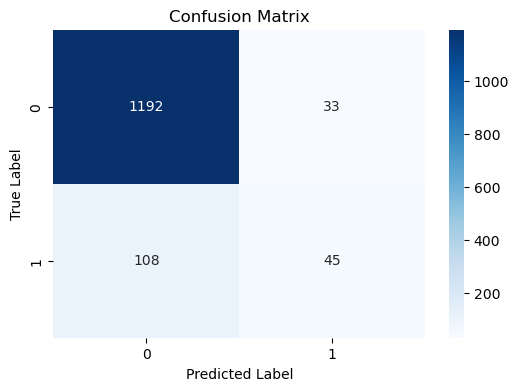

In [335]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(Default_train['Default'], y_class_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

In [333]:
45/153

0.29411764705882354

In [334]:
45/78

0.5769230769230769

## Prediction on the Data

Now, let us see the predicted probability values.

In [280]:
y_prob_pred_4 = model_4.predict()

In [283]:
 from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['Default'],y_prob_pred_train)

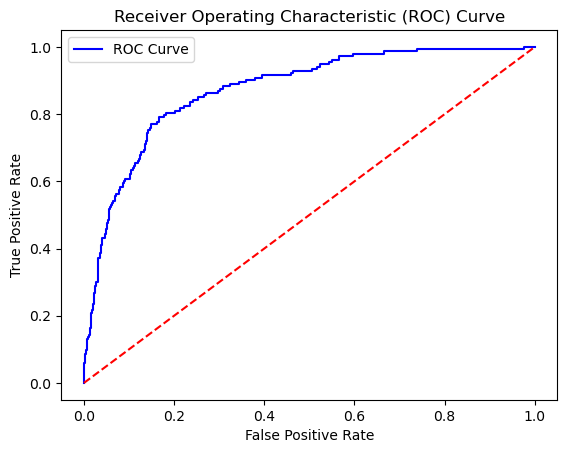

In [336]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(Default_train['Default'], y_prob_pred_train)

plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [341]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.12077061851088428

#### Validating on the train set with revised threshold

In [342]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

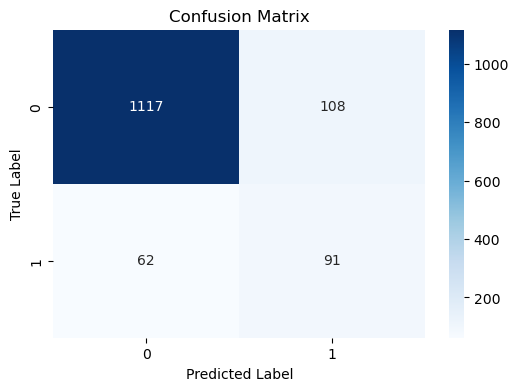

In [343]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(Default_train['Default'], y_class_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

Let us now go ahead and print the classification report to check the various other parameters.

In [290]:
print(metrics.classification_report(Default_train['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.947     0.912     0.929      1225
         1.0      0.457     0.595     0.517       153

    accuracy                          0.877      1378
   macro avg      0.702     0.753     0.723      1378
weighted avg      0.893     0.877     0.884      1378



### Validating on the test set

In [344]:
y_prob_pred_test = model_4.predict(Default_test)

In [345]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.26:
        a=1
    else:
        a=0
    y_class_pred.append(a)

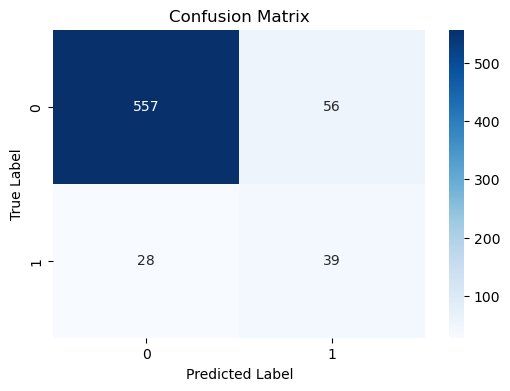

In [346]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(Default_test['Default'], y_class_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

plt.show()

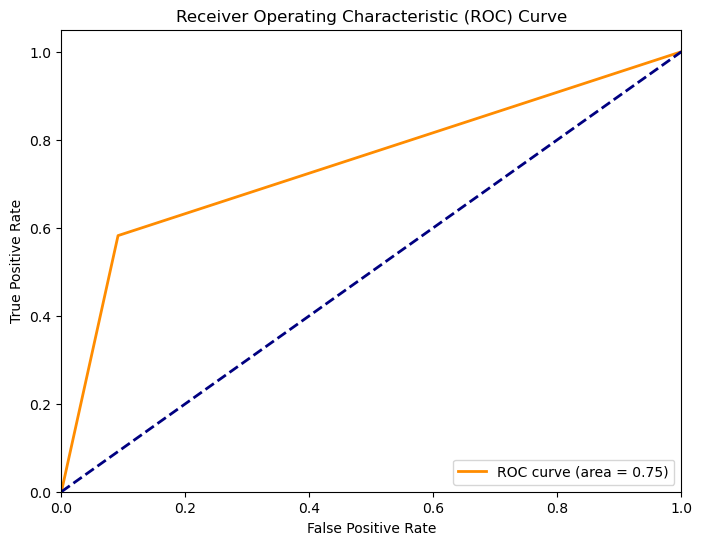

In [348]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Default_test['Default'],  y_class_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [294]:
print(metrics.classification_report(Default_test['Default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.952     0.909     0.930       613
         1.0      0.411     0.582     0.481        67

    accuracy                          0.876       680
   macro avg      0.681     0.745     0.706       680
weighted avg      0.899     0.876     0.886       680



# Random Forest Classifier

In [295]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [298]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 25}

In [299]:
best_grid = grid_search.best_estimator_

In [300]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

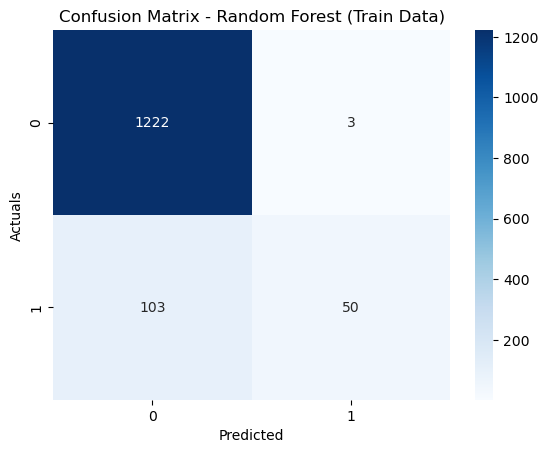

In [357]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_train,pred_train_rf)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.title('Confusion Matrix - Random Forest (Train Data)')
plt.show()

In [301]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1225
         1.0       0.94      0.33      0.49       153

    accuracy                           0.92      1378
   macro avg       0.93      0.66      0.72      1378
weighted avg       0.92      0.92      0.91      1378



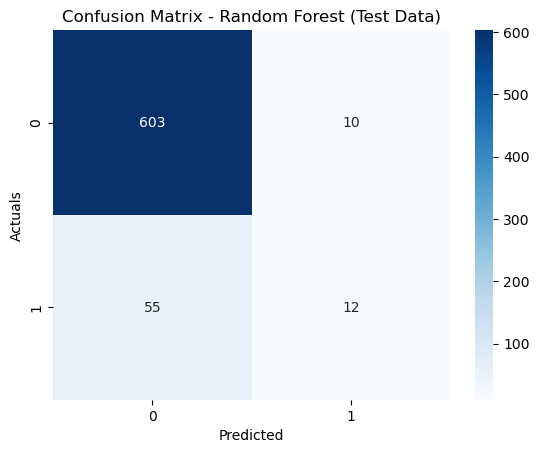

In [349]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred_test_rf)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.title('Confusion Matrix - Random Forest (Test Data)')
plt.show()

<Figure size 800x600 with 0 Axes>

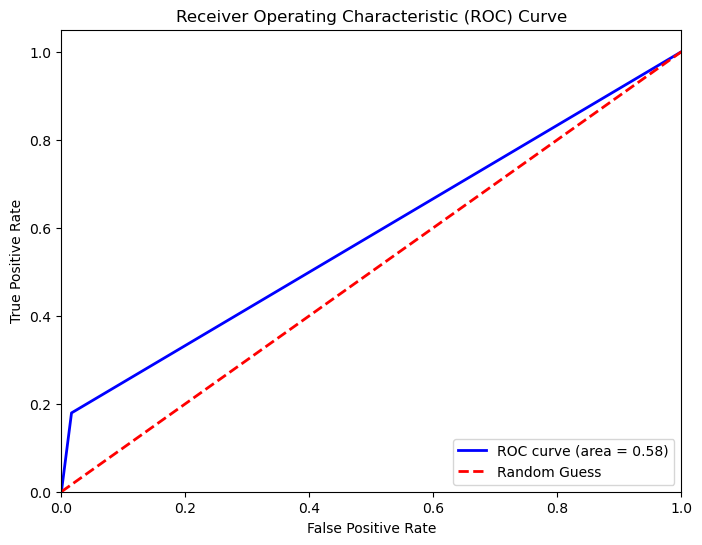

In [355]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,  pred_test_rf)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [302]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       613
         1.0       0.55      0.18      0.27        67

    accuracy                           0.90       680
   macro avg       0.73      0.58      0.61       680
weighted avg       0.88      0.90      0.88       680



# Linear Discriminant Analysis

In [303]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [304]:
LDA = LinearDiscriminantAnalysis()

In [305]:
lda_model = LDA.fit(X_train, y_train)

In [306]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [307]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95      1225
         1.0       0.57      0.44      0.50       153

    accuracy                           0.90      1378
   macro avg       0.75      0.70      0.72      1378
weighted avg       0.89      0.90      0.90      1378



In [308]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       613
         1.0       0.45      0.42      0.43        67

    accuracy                           0.89       680
   macro avg       0.69      0.68      0.69       680
weighted avg       0.89      0.89      0.89       680



In [309]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [311]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [358]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.28:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [314]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.950     0.910     0.930      1225
         1.0      0.461     0.614     0.527       153

    accuracy                          0.877      1378
   macro avg      0.705     0.762     0.728      1378
weighted avg      0.895     0.877     0.885      1378



In [360]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.28:
        a=1
    else:
        a=0
    y_class_pred.append(a)

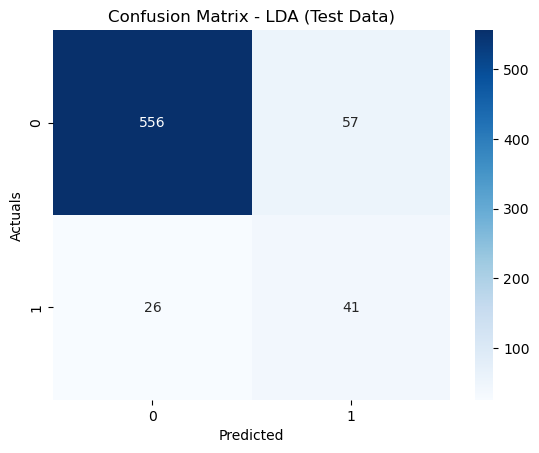

In [367]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test,y_class_pred)

# Plot the heatmap
sns.heatmap(cm, annot=True, fmt='.5g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actuals')
plt.title('Confusion Matrix - LDA (Test Data)')
plt.show()

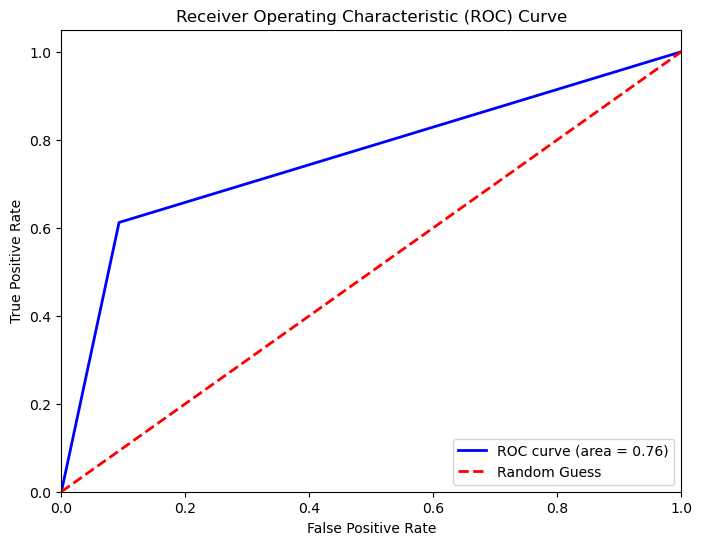

In [362]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_class_pred)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [317]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

         0.0      0.955     0.907     0.931       613
         1.0      0.418     0.612     0.497        67

    accuracy                          0.878       680
   macro avg      0.687     0.759     0.714       680
weighted avg      0.902     0.878     0.888       680



LDA is best model amongest all 

# PROBLEM B - Market Risk

In [371]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

#### Setting working directory

In [372]:
#import os
#os.chdir('F:/Data science/GL/FRA/')
#os.getcwd()

Let us now go ahead and read the dataset and check the first five rows of the dataset

In [374]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


#### Fixing messy column names (containing spaces) for ease of use

In [375]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('.', '')

#### Checking top 5 rows again

In [376]:
stock_prices.head()


,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


#### First, let us check the number of rows (observations) and the number of columns (variables)

In [377]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


#### Checking data types of all columns

In [378]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [379]:
stock_prices.describe()       

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


## Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

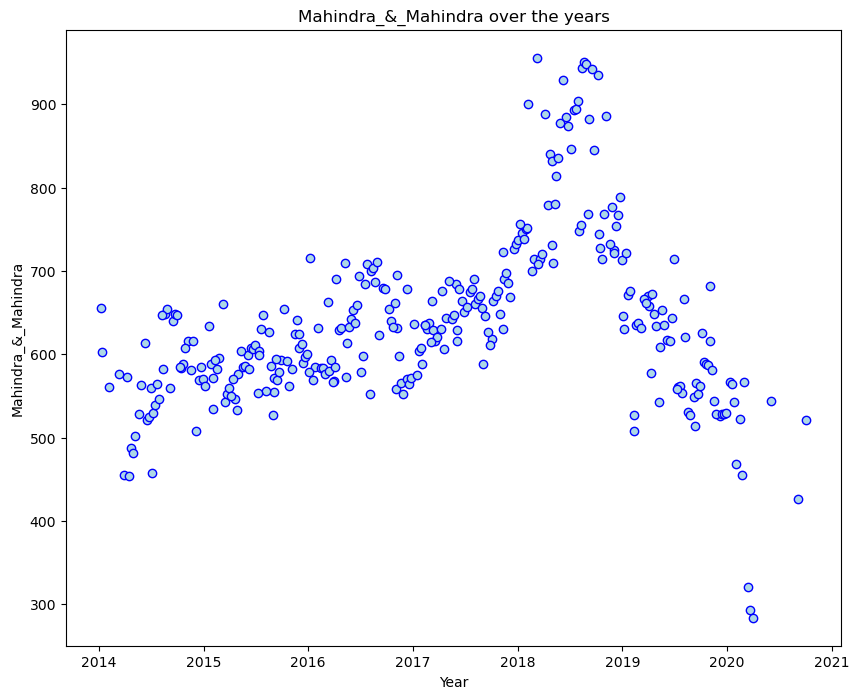

In [380]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Mahindra_&_Mahindra'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Mahindra_&_Mahindra')
plt.title('Mahindra_&_Mahindra over the years')
plt.show()

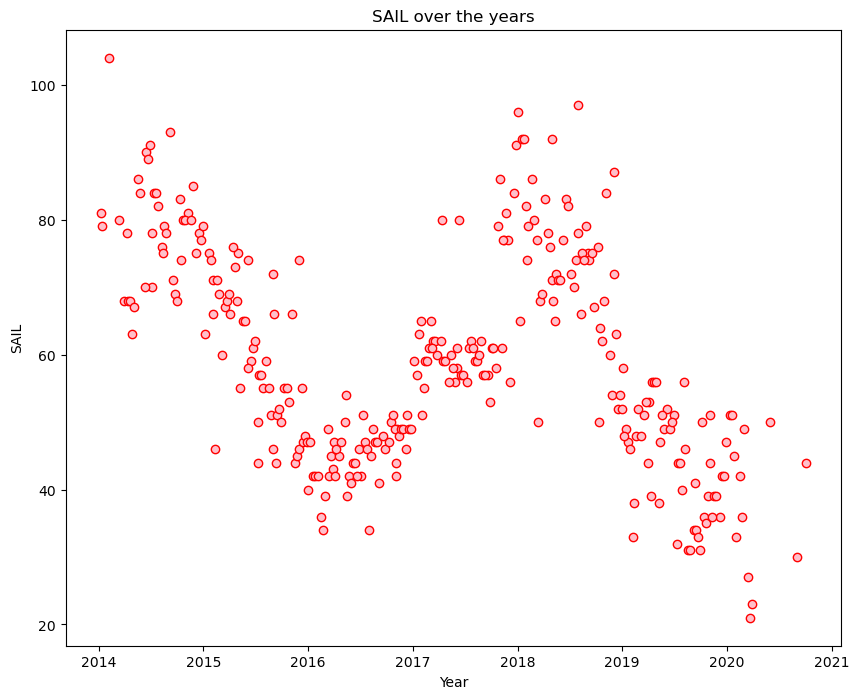

In [383]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['SAIL'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('SAIL')
plt.title('SAIL over the years')
plt.show()

## Calculate Returns for all stocks with inference

## Analyzing returns

Steps for calculating returns from prices:
- Take logarithms
- Take differences

In [384]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

Checking the rows & columns of dataset

In [385]:

stock_returns.shape

(314, 10)

In [386]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


## Calculate Stock Means and Standard Deviation for all stocks with inference

### We now look at Means & Standard Deviations of these returns

- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

#### Calculating stock means

In [387]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.002794
Indian_Hotel           0.000266
Mahindra_&_Mahindra   -0.001506
Axis_Bank              0.001167
SAIL                  -0.003463
Shree_Cement           0.003681
Sun_Pharma            -0.001455
Jindal_Steel          -0.004123
Idea_Vodafone         -0.010608
Jet_Airways           -0.009548
dtype: float64

#### Calculating stock standard deviation

In [388]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                0.035070
Indian_Hotel           0.047131
Mahindra_&_Mahindra    0.040169
Axis_Bank              0.045828
SAIL                   0.062188
Shree_Cement           0.039917
Sun_Pharma             0.045033
Jindal_Steel           0.075108
Idea_Vodafone          0.104315
Jet_Airways            0.097972
dtype: float64

## Draw a plot of Stock Means vs Standard Deviation and state your inference

In [391]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_&_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


#### Let us plot & see what they say about stock prices

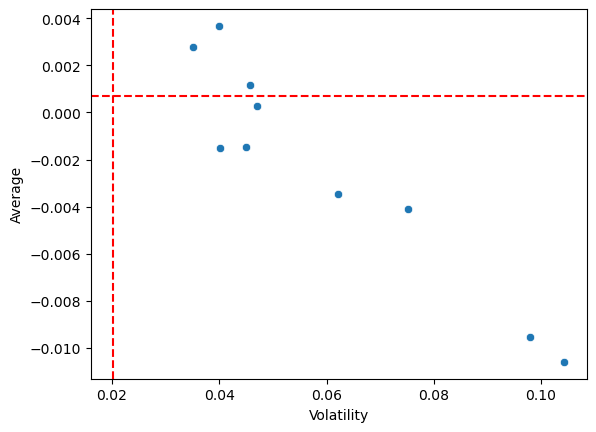

In [393]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(x=df['Volatility'], y=df['Average'])
plot.axvline(x=0.020257,linestyle='--', color = "red")
plot.axhline(y=0.000683,linestyle='--', color = "red")
plt.show()